In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from patsy import dmatrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model
import io
import plotly as pl
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [ ]:
train = pd.read_csv("/content/top_insta_influencers_data.csv")

In [ ]:
train.info()
train.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   rank               200 non-null    int64 
 1   channel_info       200 non-null    object
 2   influence_score    200 non-null    int64 
 3   posts              200 non-null    object
 4   followers          200 non-null    object
 5   avg_likes          200 non-null    object
 6   60_day_eng_rate    200 non-null    object
 7   new_post_avg_like  200 non-null    object
 8   total_likes        200 non-null    object
 9   country            138 non-null    object
dtypes: int64(2), object(8)
memory usage: 15.8+ KB


Index(['rank', 'channel_info', 'influence_score', 'posts', 'followers',
       'avg_likes', '60_day_eng_rate', 'new_post_avg_like', 'total_likes',
       'country'],
      dtype='object')

In [ ]:
train=train.set_index('rank')
train.head()

,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
rank,,,,,,,,,
1,cristiano,92,3.3k,475.8m,8.7m,1.39%,6.5m,29.0b,Spain
2,kyliejenner,91,6.9k,366.2m,8.3m,1.62%,5.9m,57.4b,United States
3,leomessi,90,0.89k,357.3m,6.8m,1.24%,4.4m,6.0b,NaN
4,selenagomez,93,1.8k,342.7m,6.2m,0.97%,3.3m,11.5b,United States
5,therock,91,6.8k,334.1m,1.9m,0.20%,665.3k,12.5b,United States


In [ ]:
post=list(train['posts'])
post1=list()
for num in post:
  if 'k' in num:
    new_num=1000*float(num.replace('k',''))
    post1.append(new_num)
  else:
    post1.append(float(num))
train['posts']=post1

followers=list(train['followers'])
followers1=list()
for num in followers:
    if 'm' in num:
        new_num=1000000*float(num.replace('m',''))
        followers1.append(new_num)
    else:
        followers1.append(float(num))
train['followers']=followers1

avg_likes=list(train['avg_likes'])
avg_likes1=list()
for num in avg_likes:
    if 'm' in num:
        new_num=1000000*float(num.replace('m',''))
        avg_likes1.append(new_num)
    else:
        new_num=1000*float(num.replace('k',''))
        avg_likes1.append(new_num)
train['avg_likes']=avg_likes1

new_post_avg_like=list(train['new_post_avg_like'])
new_post_avg_like1=list()
for num in new_post_avg_like:
    if 'm' in num:
        new_num=1000000*float(num.replace('m',''))
        new_post_avg_like1.append(new_num)
    else:
       new_num=1000*float(num.replace('k',''))
       new_post_avg_like1.append(new_num)
train['new_post_avg_like']=new_post_avg_like1

total_likes=list(train['total_likes'])
total_likes1=list()
for num in total_likes:
    if 'b' in num:
        new_num=1000000000*float(num.replace('b',''))
        total_likes1.append(new_num)
    else:
        new_num=1000000*float(num.replace('m',''))
        total_likes1.append(new_num)
train['total_likes']=total_likes1

day_eng_rate=list(train['60_day_eng_rate'])
day_eng_rate1=list()
for num in day_eng_rate:
    if '%' in num:
        new_num=float(num.replace('%',''))
        day_eng_rate1.append(new_num)
    else:
        new_num=float(num)
        day_eng_rate1.append(new_num)
train['60_day_eng_rate']=day_eng_rate1

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   channel_info       200 non-null    object 
 1   influence_score    200 non-null    int64  
 2   posts              200 non-null    float64
 3   followers          200 non-null    float64
 4   avg_likes          200 non-null    float64
 5   60_day_eng_rate    199 non-null    float64
 6   new_post_avg_like  200 non-null    float64
 7   total_likes        200 non-null    float64
 8   country            138 non-null    object 
dtypes: float64(6), int64(1), object(2)
memory usage: 15.6+ KB


In [ ]:
train.describe()

,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes
count,200.000000,200.000000,2.000000e+02,2.000000e+02,199.000000,2.000000e+02,2.000000e+02
mean,81.820000,3499.850000,7.740950e+07,1.787104e+06,1.902010,1.208132e+06,3.658112e+09
std,8.878159,3475.828158,7.368727e+07,2.193359e+06,3.329719,1.858322e+06,5.561939e+09
min,22.000000,10.000000,3.280000e+07,6.510000e+04,0.010000,0.000000e+00,1.830000e+07
25%,80.000000,947.500000,4.000000e+07,5.044000e+05,0.410000,1.957500e+05,9.968500e+08
50%,84.000000,2100.000000,5.005000e+07,1.100000e+06,0.880000,5.321500e+05,2.000000e+09
75%,86.000000,5025.000000,6.890000e+07,2.100000e+06,2.035000,1.325000e+06,3.900000e+09
max,93.000000,17500.000000,4.758000e+08,1.540000e+07,26.410000,1.260000e+07,5.740000e+10


In [ ]:
mean_value = train['60_day_eng_rate'].mean()
train['60_day_eng_rate'].fillna(mean_value, inplace=True)
train.groupby('channel_info').count()

<ipython-input-10-7931fe1bfab6>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['60_day_eng_rate'].fillna(mean_value, inplace=True)


,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
channel_info,,,,,,,,
433,1,1,1,1,1,1,1,1
5-Minute Crafts GIRLY,1,1,1,1,1,1,1,1
9gag,1,1,1,1,1,1,1,1
Shakira,1,1,1,1,1,1,1,0
addisonraee,1,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...
worldstar,1,1,1,1,1,1,1,1
zacefron,1,1,1,1,1,1,1,1
zayn,1,1,1,1,1,1,1,1


In [ ]:
train.head()

,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
rank,,,,,,,,,
1,cristiano,92,3300.0,475800000.0,8700000.0,1.39,6500000.0,2.900000e+10,Spain
2,kyliejenner,91,6900.0,366200000.0,8300000.0,1.62,5900000.0,5.740000e+10,United States
3,leomessi,90,890.0,357300000.0,6800000.0,1.24,4400000.0,6.000000e+09,NaN
4,selenagomez,93,1800.0,342700000.0,6200000.0,0.97,3300000.0,1.150000e+10,United States
5,therock,91,6800.0,334100000.0,1900000.0,0.20,665300.0,1.250000e+10,United States


In [ ]:
import plotly.express as px # Import plotly.express and alias it as px
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# %%
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from patsy import dmatrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model
import io
import plotly as pl
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
# %%
train = pd.read_csv("/content/top_insta_influencers_data.csv")
# %%
train.info()
train.columns
# %%
train=train.set_index('rank')
train.head()
# %%
post=list(train['posts'])
post1=list()
for num in post:
  if 'k' in num:
    new_num=1000*float(num.replace('k',''))
    post1.append(new_num)
  else:
    post1.append(float(num))
train['posts']=post1

followers=list(train['followers'])
followers1=list()
for num in followers:
    if 'm' in num:
        new_num=1000000*float(num.replace('m',''))
        followers1.append(new_num)
    else:
        followers1.append(float(num))
train['followers']=followers1

avg_likes=list(train['avg_likes'])
avg_likes1=list()
for num in avg_likes:
    if 'm' in num:
        new_num=1000000*float(num.replace('m',''))
        avg_likes1.append(new_num)
    else:
        new_num=1000*float(num.replace('k',''))
        avg_likes1.append(new_num)
train['avg_likes']=avg_likes1

new_post_avg_like=list(train['new_post_avg_like'])
new_post_avg_like1=list()
for num in new_post_avg_like:
    if 'm' in num:
        new_num=1000000*float(num.replace('m',''))
        new_post_avg_like1.append(new_num)
    else:
       new_num=1000*float(num.replace('k',''))
       new_post_avg_like1.append(new_num)
train['new_post_avg_like']=new_post_avg_like1

total_likes=list(train['total_likes'])
total_likes1=list()
for num in total_likes:
    if 'b' in num:
        new_num=1000000000*float(num.replace('b',''))
        total_likes1.append(new_num)
    else:
        new_num=1000000*float(num.replace('m',''))
        total_likes1.append(new_num)
train['total_likes']=total_likes1

day_eng_rate=list(train['60_day_eng_rate'])
day_eng_rate1=list()
for num in day_eng_rate:
    if '%' in num:
        new_num=float(num.replace('%',''))
        day_eng_rate1.append(new_num)
    else:
        new_num=float(num)
        day_eng_rate1.append(new_num)
train['60_day_eng_rate']=day_eng_rate1
# %%
train.info()
# %%
train.describe()
# %%
mean_value = train['60_day_eng_rate'].mean()
train['60_day_eng_rate'].fillna(mean_value, inplace=True)
train.groupby('channel_info').count()
# %%
train.head()
# %%
px.box(train,x="60_day_eng_rate",y="total_likes")
px.box(train,x="60_day_eng_rate",y="total_likes")
px.scatter(train,x="followers",y="total_likes",marginal_x="box",marginal_y="violin",trendline="ols")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   rank               200 non-null    int64 
 1   channel_info       200 non-null    object
 2   influence_score    200 non-null    int64 
 3   posts              200 non-null    object
 4   followers          200 non-null    object
 5   avg_likes          200 non-null    object
 6   60_day_eng_rate    200 non-null    object
 7   new_post_avg_like  200 non-null    object
 8   total_likes        200 non-null    object
 9   country            138 non-null    object
dtypes: int64(2), object(8)
memory usage: 15.8+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   channel_info       200 non-null    object 
 1   influence_score    200 non-null 

<ipython-input-12-141842768fb0>:99: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['60_day_eng_rate'].fillna(mean_value, inplace=True)


<ipython-input-13-1c47b180c525>:3: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



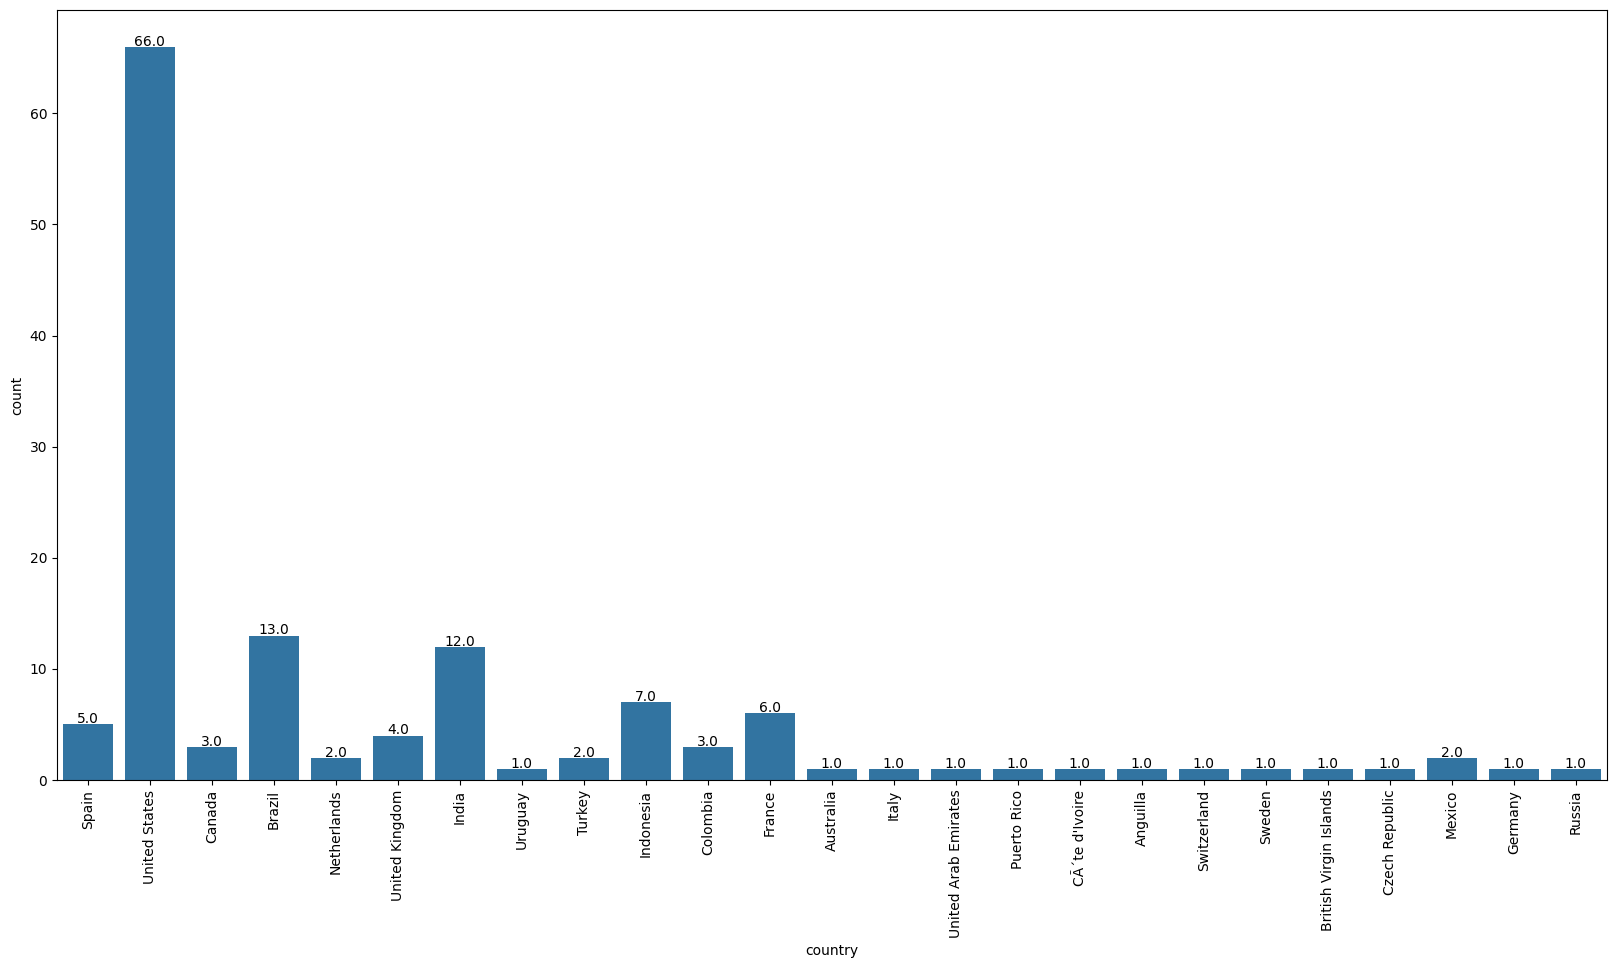

In [ ]:
fig, ax1 = plt.subplots(figsize=(20,10))
graph = sns.countplot(ax=ax1,x = 'country' , data = train)
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

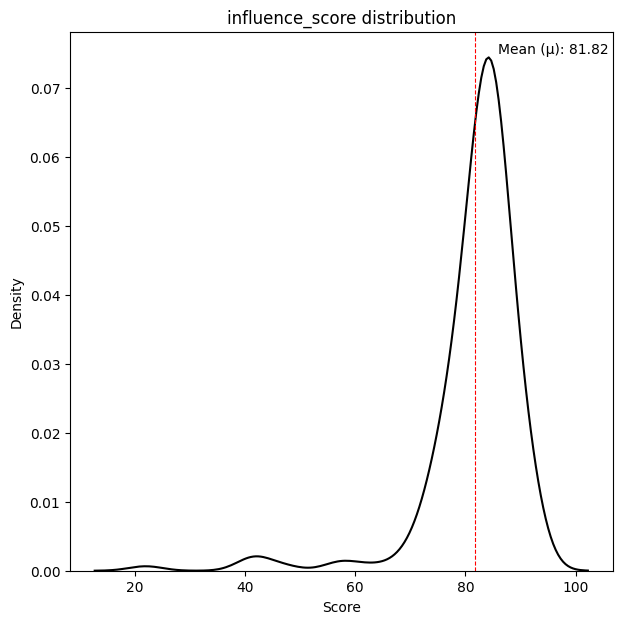

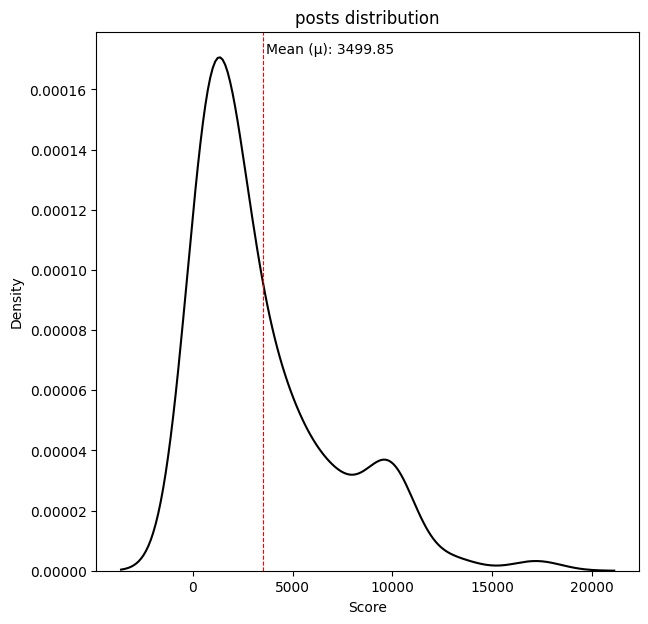

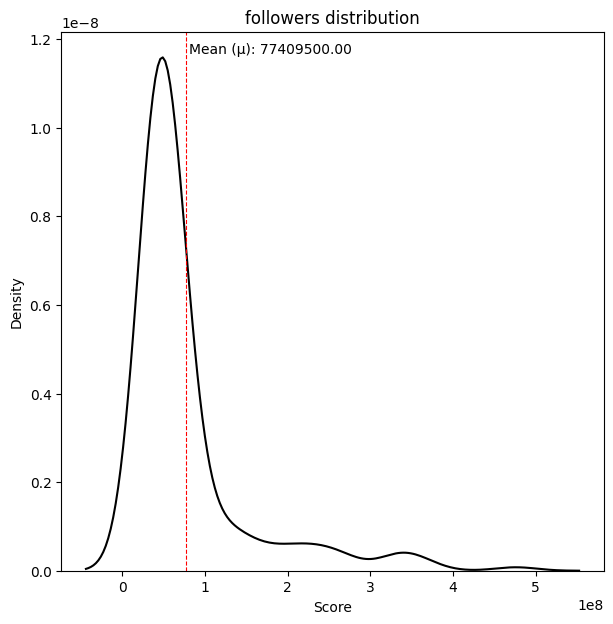

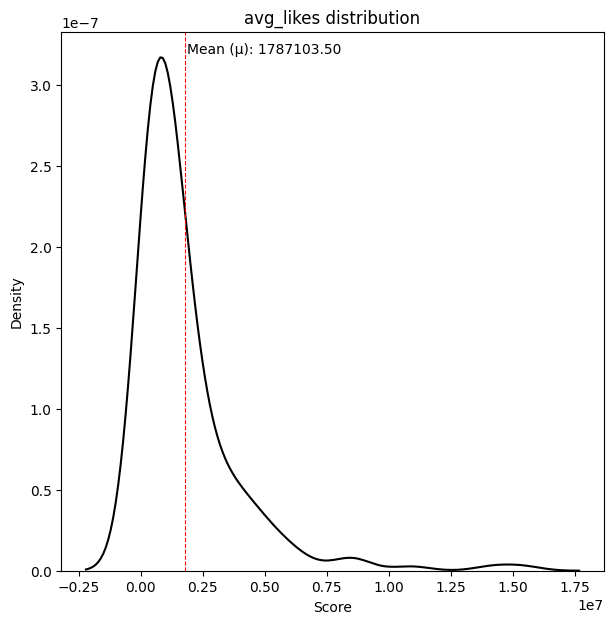

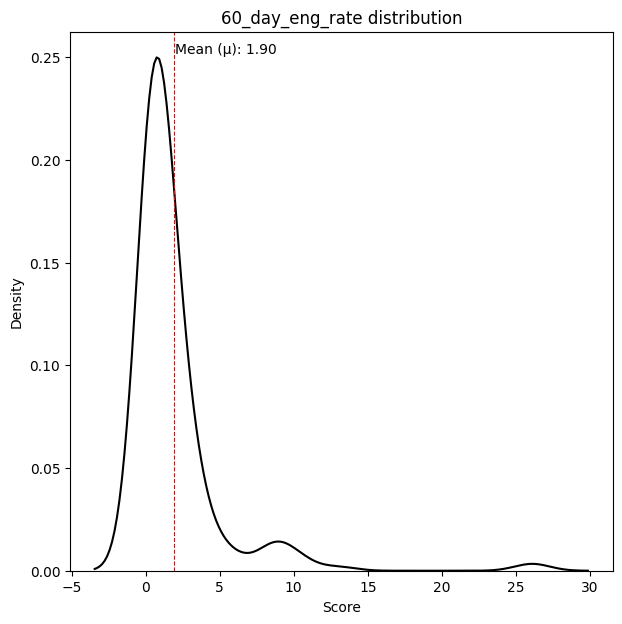

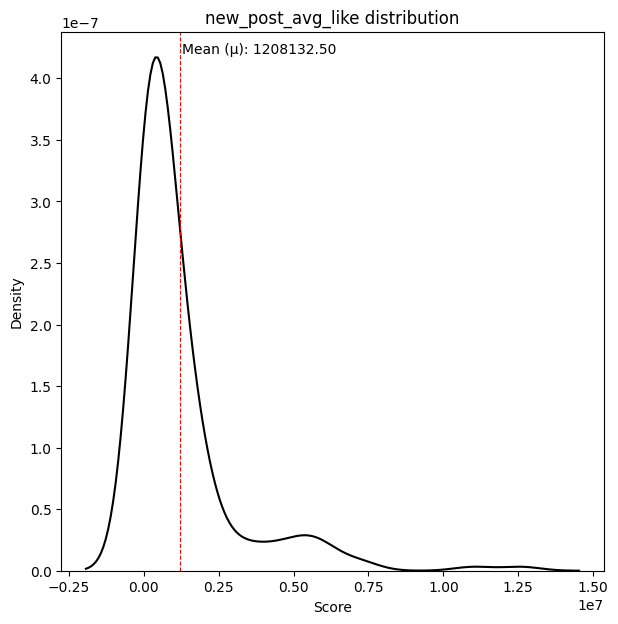

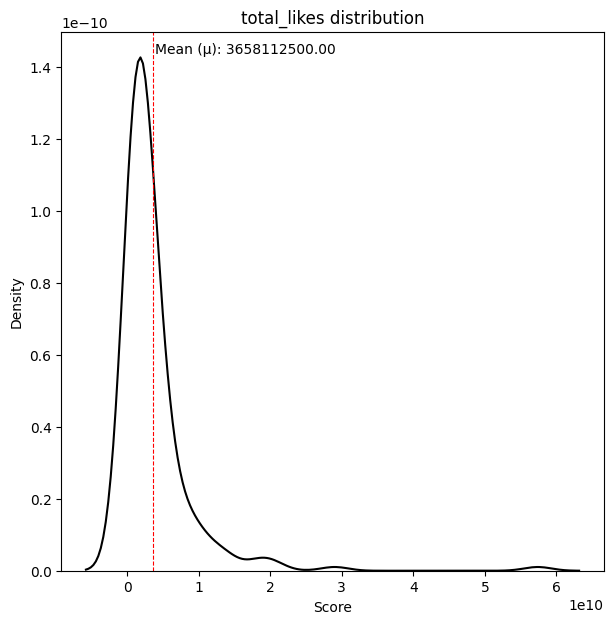

In [ ]:
num_features=['influence_score','posts','followers', 'avg_likes', '60_day_eng_rate', 'new_post_avg_like','total_likes']
for column_name in num_features:
  plt.figure(figsize=(7, 7))
  plt.title("{column_name} distribution".format(column_name = column_name))
  #sns.histplot(train[column_name], stat='density', color='#E6E6FA')
  sns.kdeplot(train[column_name], color='black')
  plt.axvline(train[column_name].mean(), color='red', linestyle='--', linewidth=0.8)
  min_ylim, max_ylim = plt.ylim()
  plt.text(train[column_name].mean()*1.05, max_ylim*0.96, 'Mean (μ): {:.2f}'.format(train[column_name].mean()))
  plt.xlabel("Score")
  plt.ylabel("Density")
  plt.show()

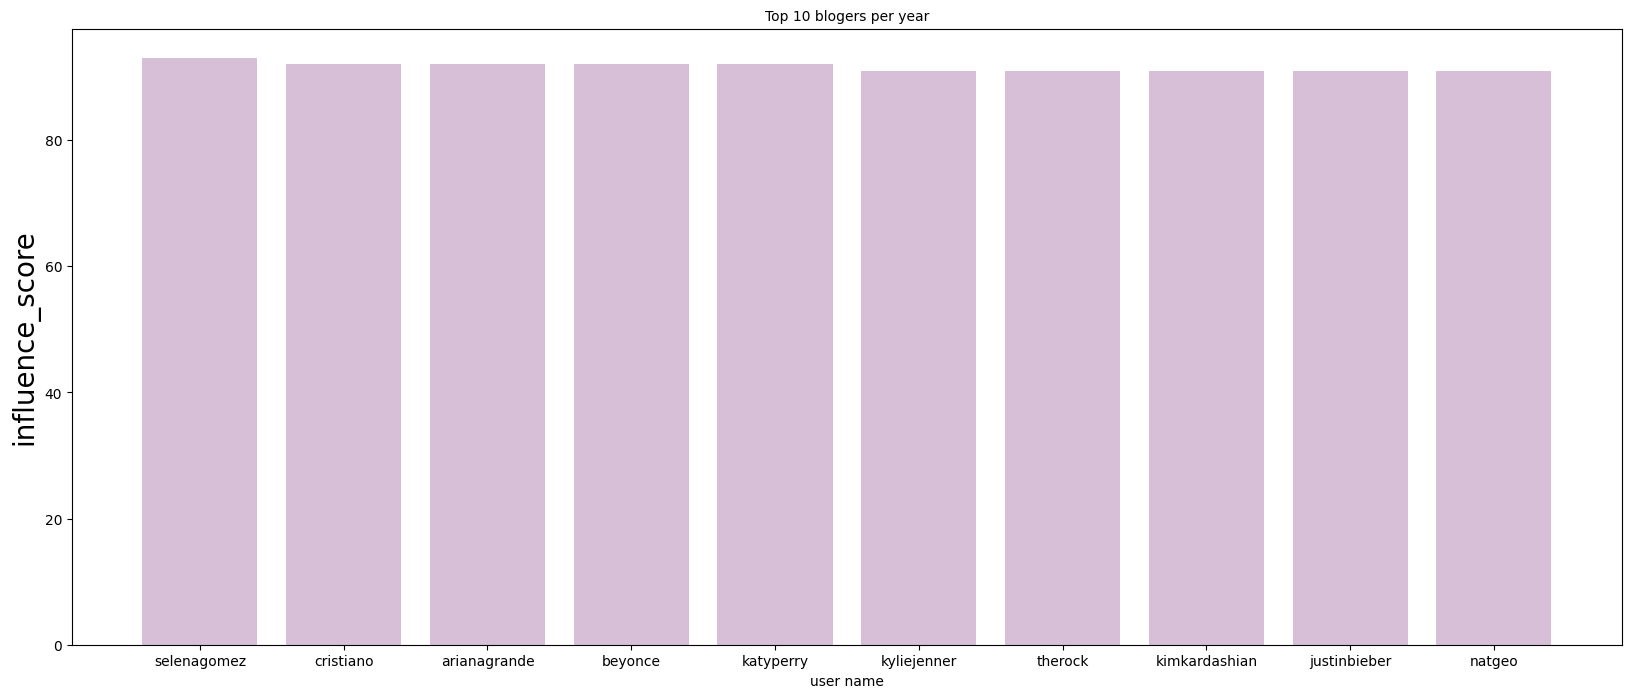

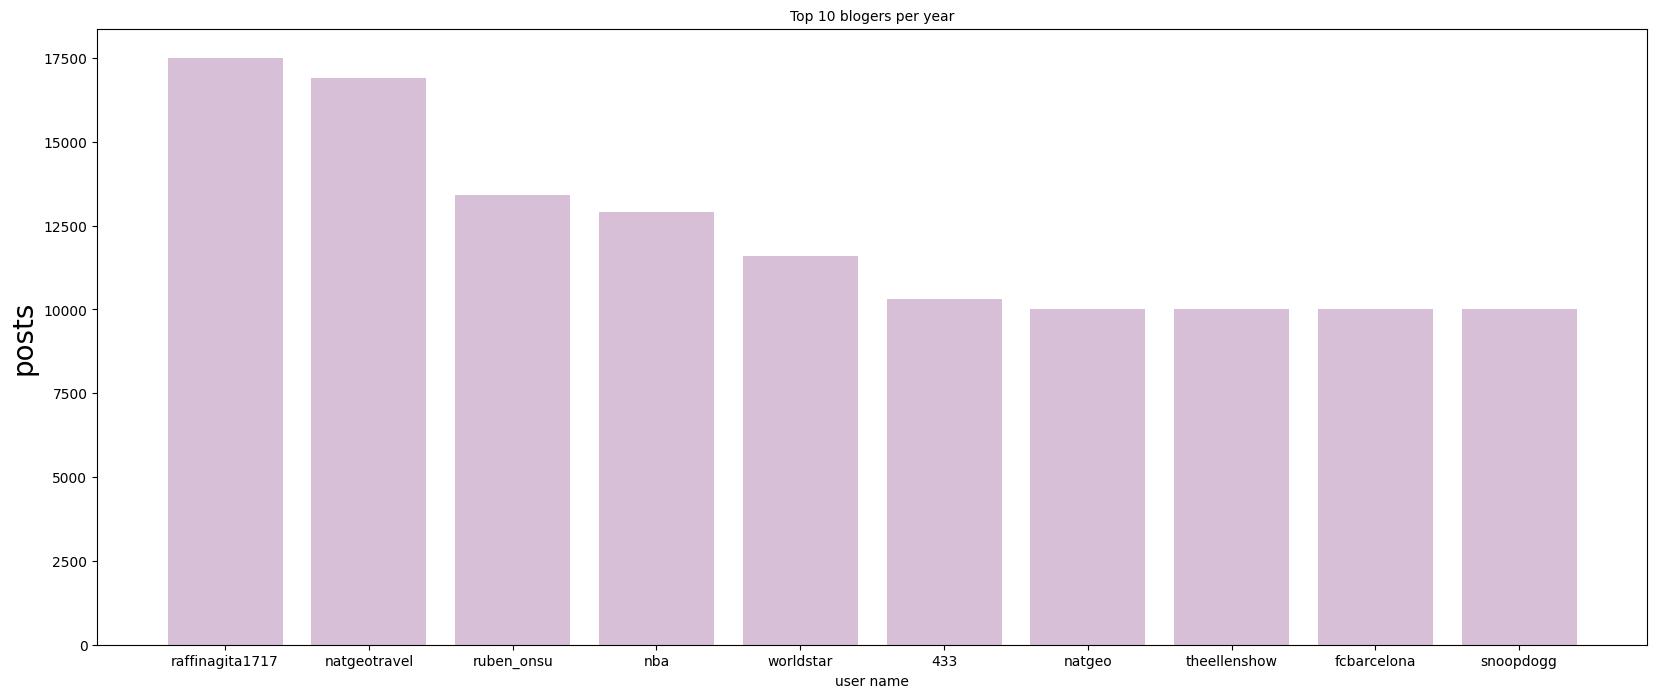

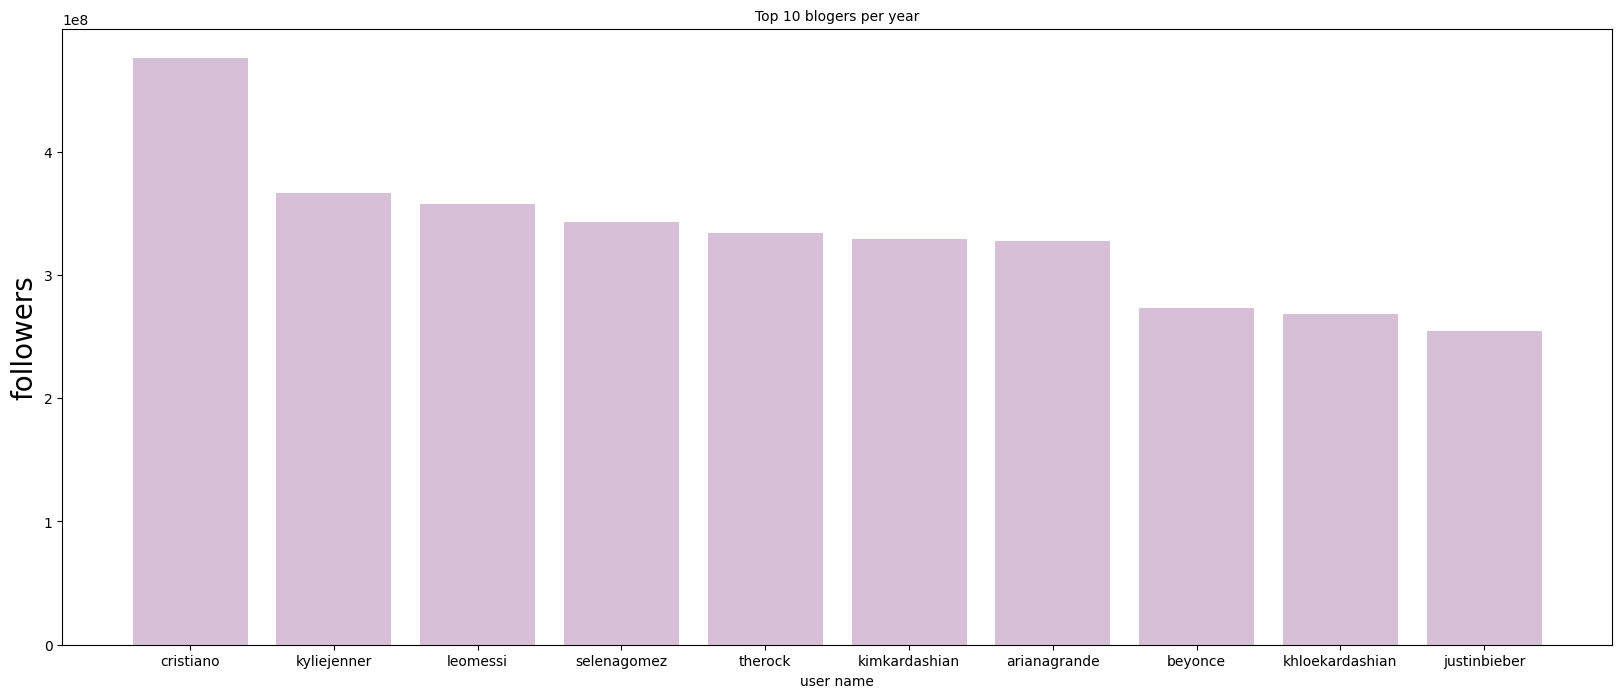

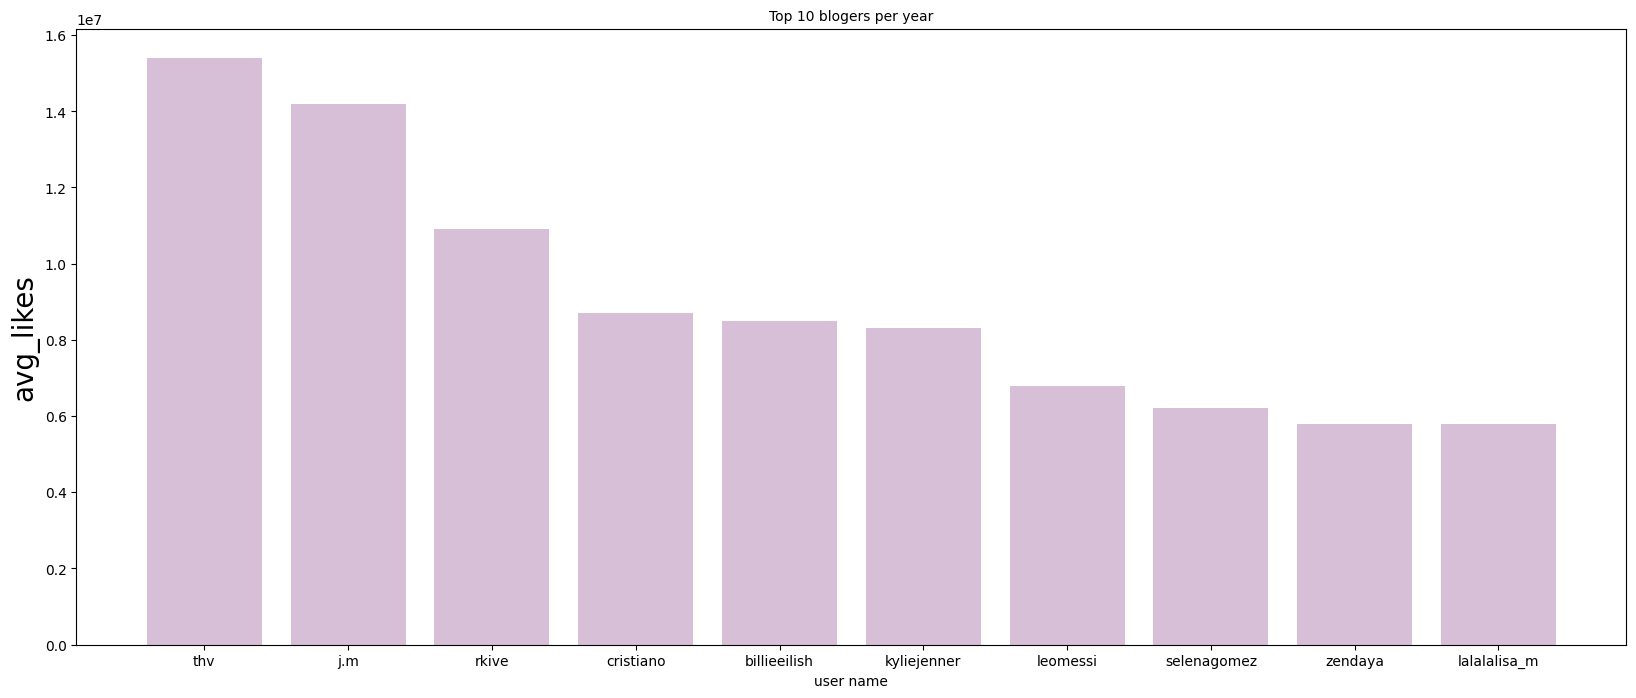

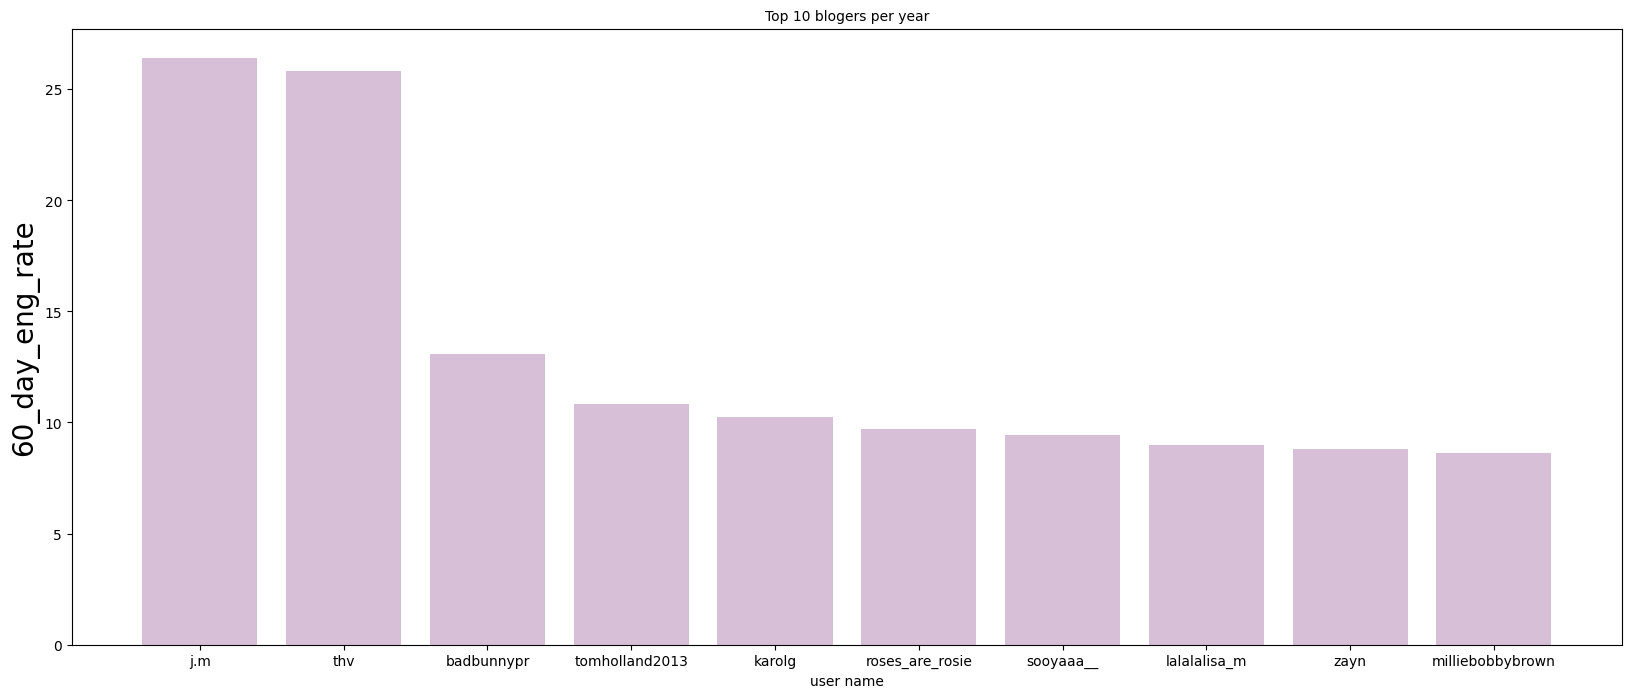

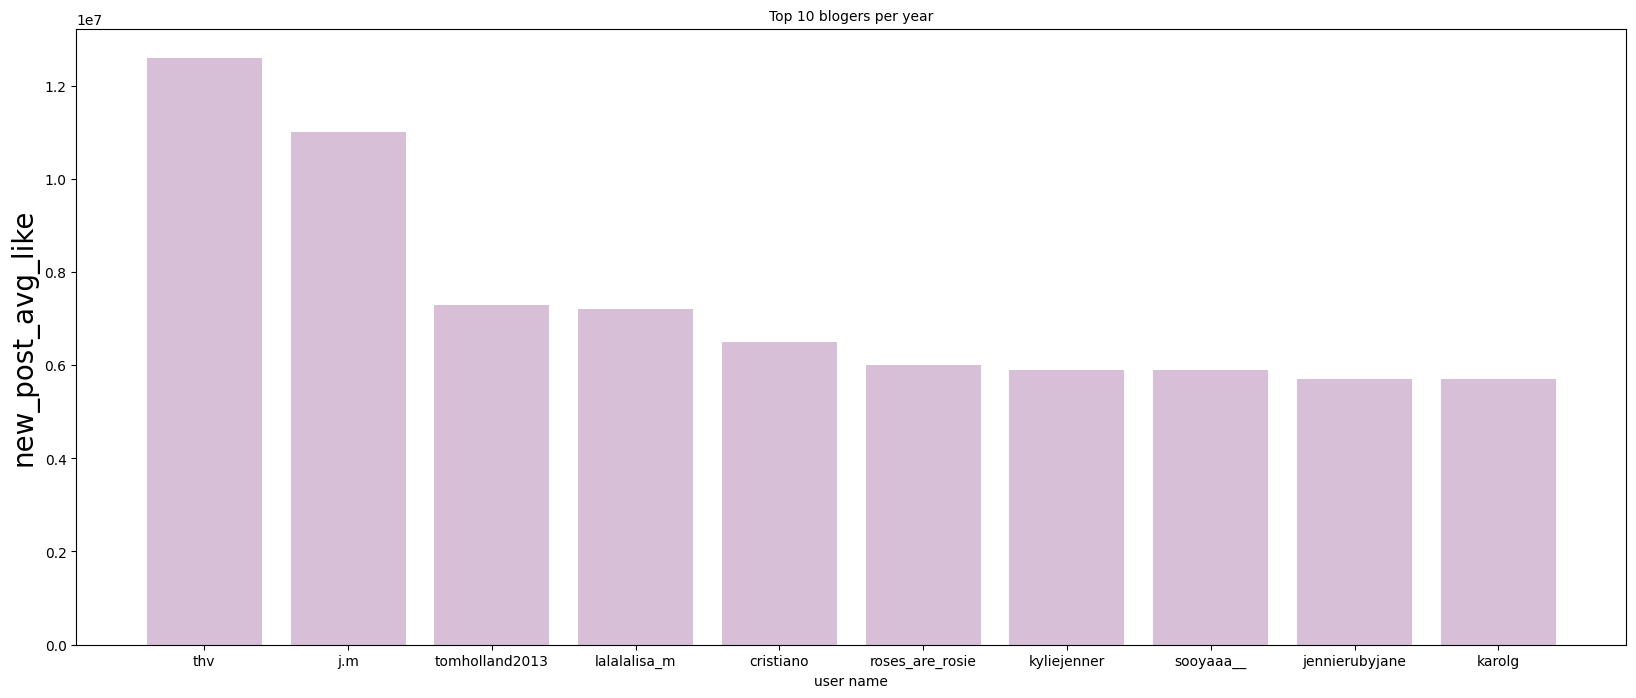

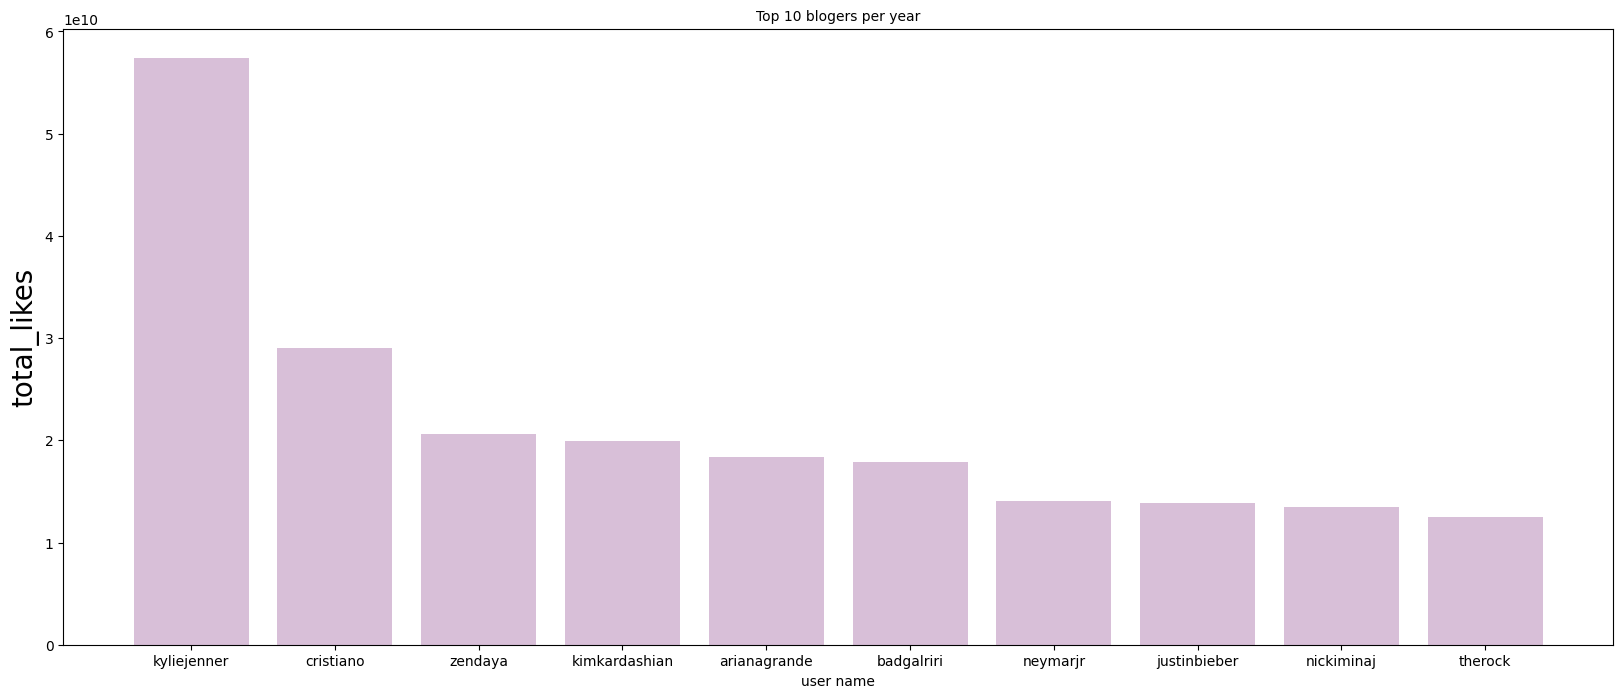

In [ ]:
for column in num_features:
  top10 = train.nlargest(10,column)
  plt.figure(figsize=(20,8))
  plt.bar(top10['channel_info'], top10[column],color='#D8BFD8')
  plt.ylabel(column, fontsize = 20)
  plt.xlabel("user name", fontsize = 10)
  plt.title("Top 10 blogers per year", fontsize = 10)

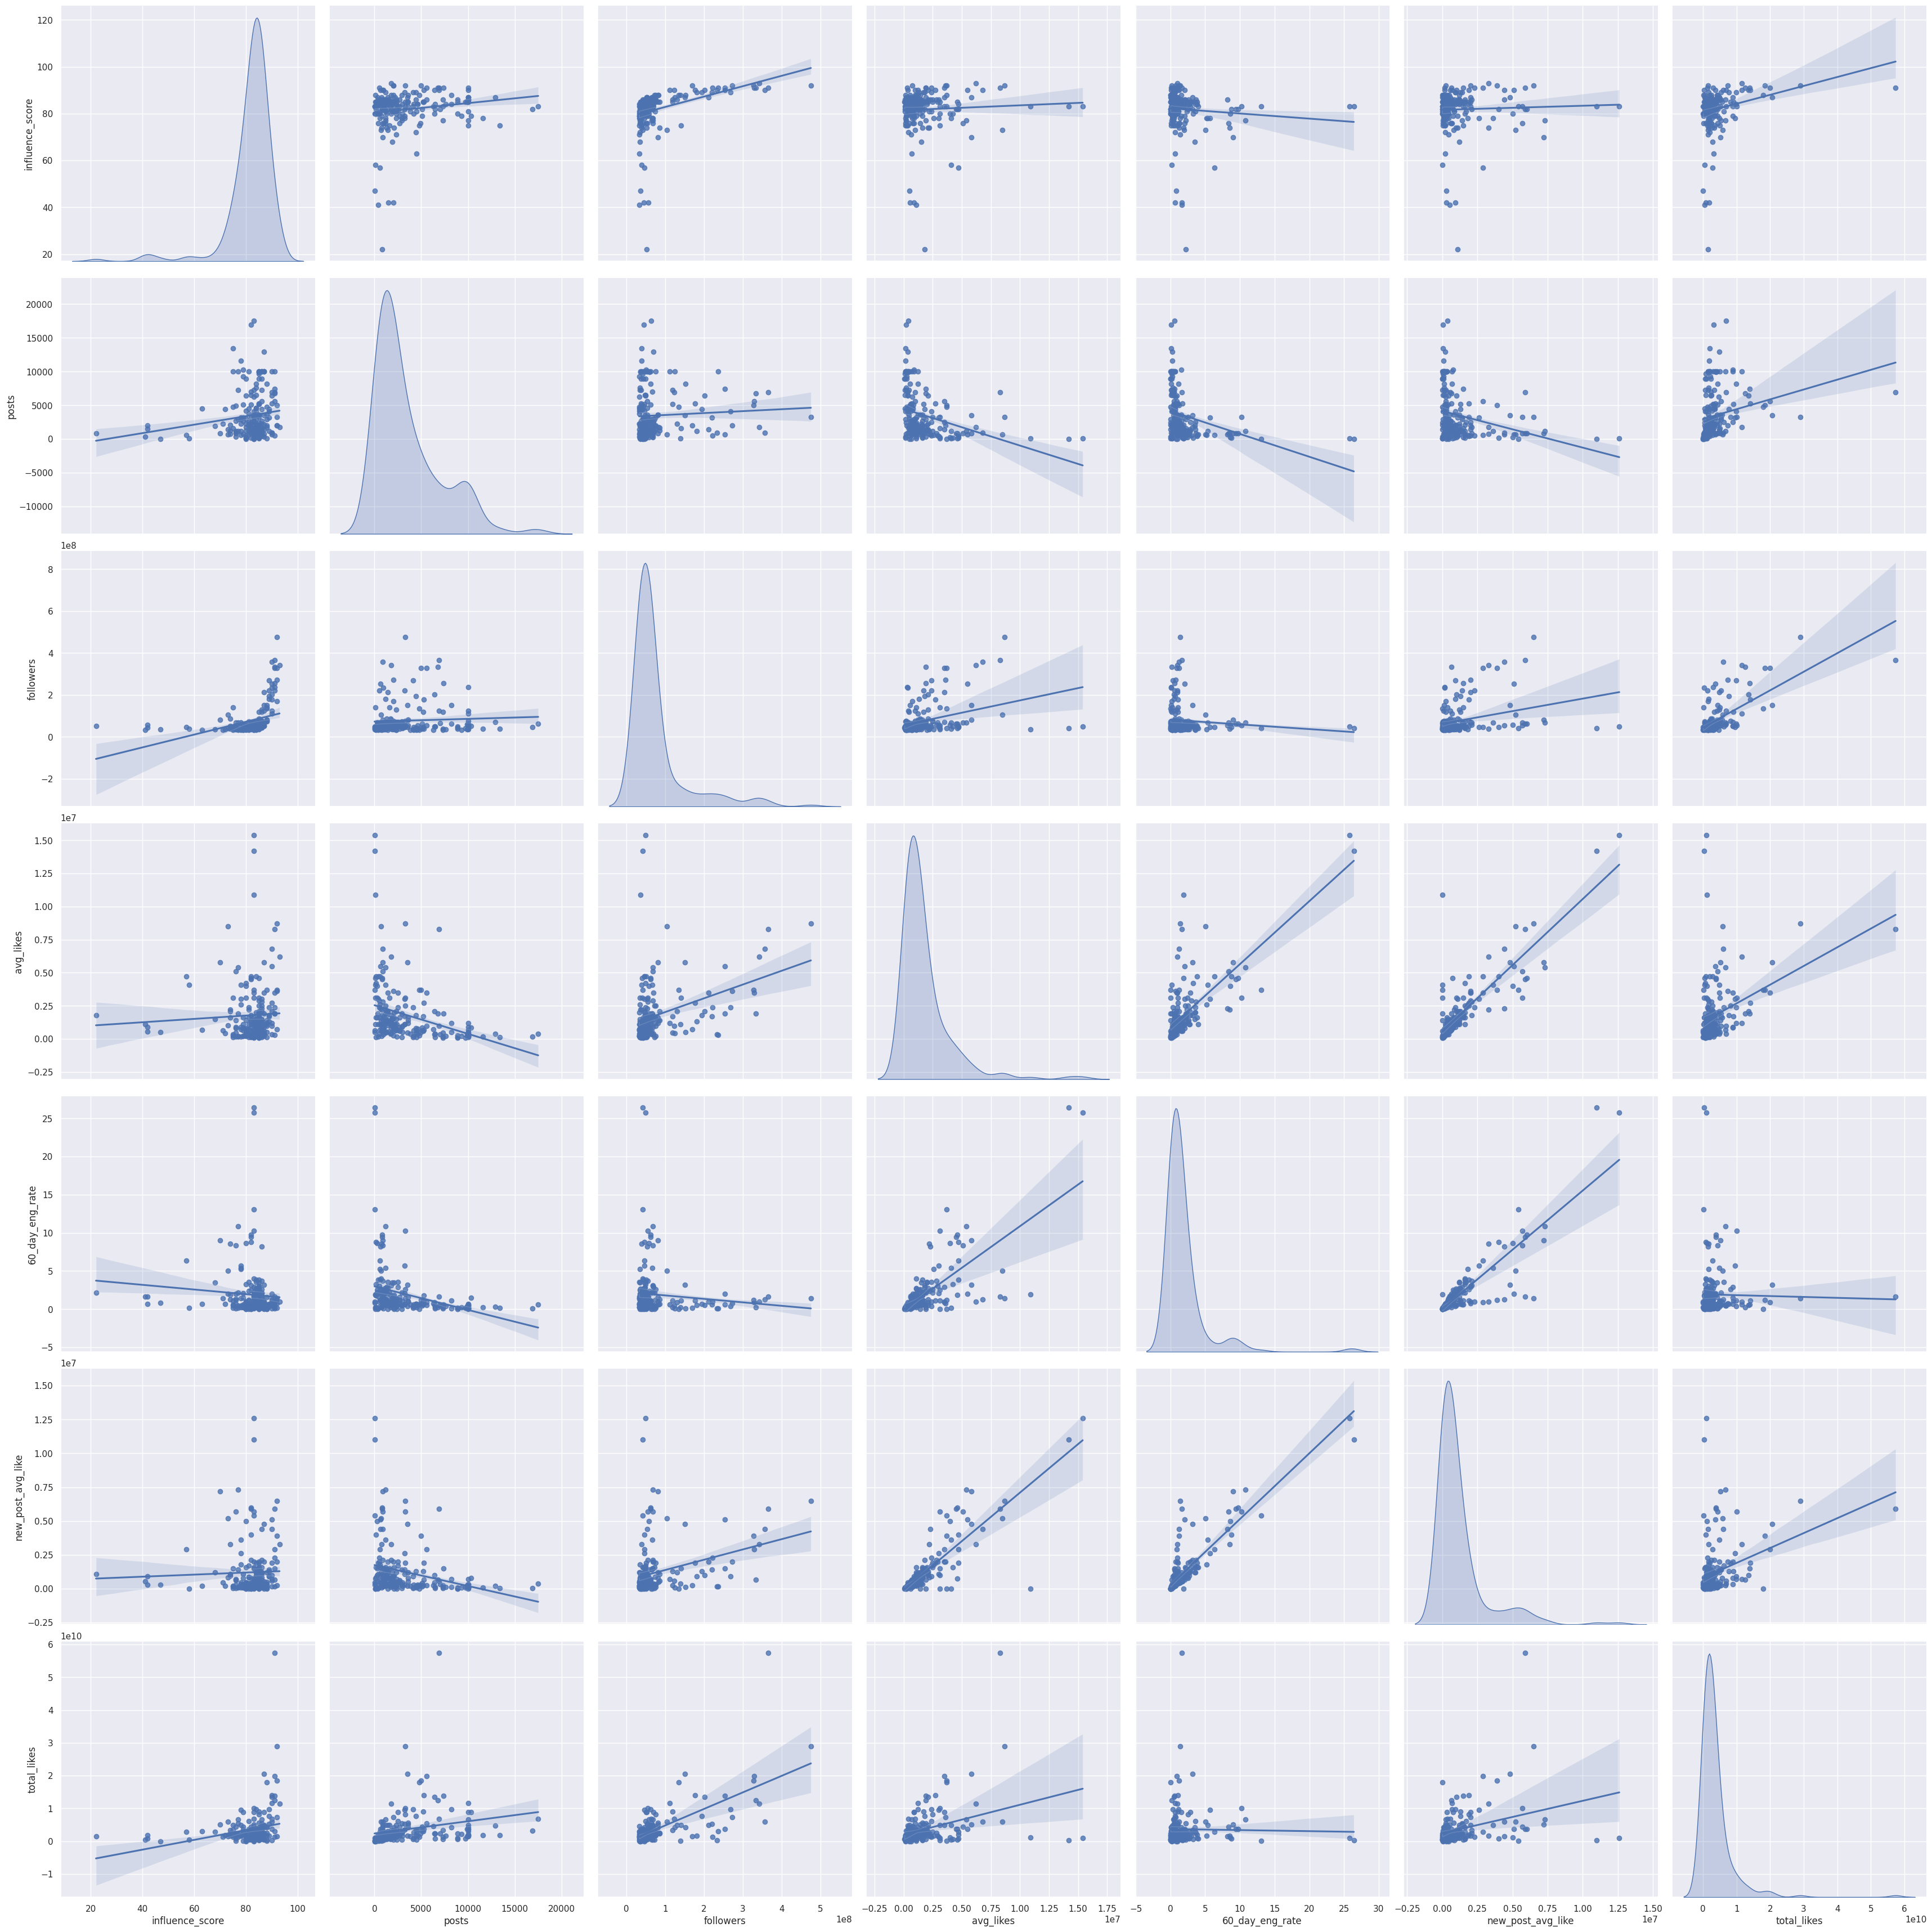

In [ ]:
sns.set()
sns.pairplot(train[num_features],height=5,kind='reg',diag_kind='kde')
plt.show()

In [ ]:
num_col=['influence_score','followers', 'total_likes','posts']
# Shapiro-Wilk Test
from scipy.stats import shapiro
# normality test
for feature in num_col:
    stat, p = shapiro(train[feature])
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')

Statistics=0.674, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.588, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.517, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.832, p=0.000
Sample does not look Gaussian (reject H0)


In [ ]:
# Convert relevant columns to numeric, handling errors
for column in train.columns:
    if train[column].dtype == 'object':  # Check if column is of object type
        try:
            train[column] = pd.to_numeric(train[column])
        except ValueError:
            # Handle non-numeric values, e.g., replace with NaN or a specific value
            train[column] = train[column].apply(lambda x: pd.to_numeric(x, errors='coerce'))
            # or train[column] = train[column].replace({'cristiano': 0})  # Example replacement

correlation = train.corr()
print(correlation['influence_score'].sort_values(ascending = False),'\n')

influence_score      1.000000
followers            0.367713
total_likes          0.237675
posts                0.160068
avg_likes            0.051478
new_post_avg_like    0.036548
60_day_eng_rate     -0.081888
channel_info              NaN
country                   NaN
Name: influence_score, dtype: float64 



Index(['influence_score', 'followers', 'total_likes', 'posts', 'avg_likes',
       'new_post_avg_like', '60_day_eng_rate', 'channel_info', 'country'],
      dtype='object')


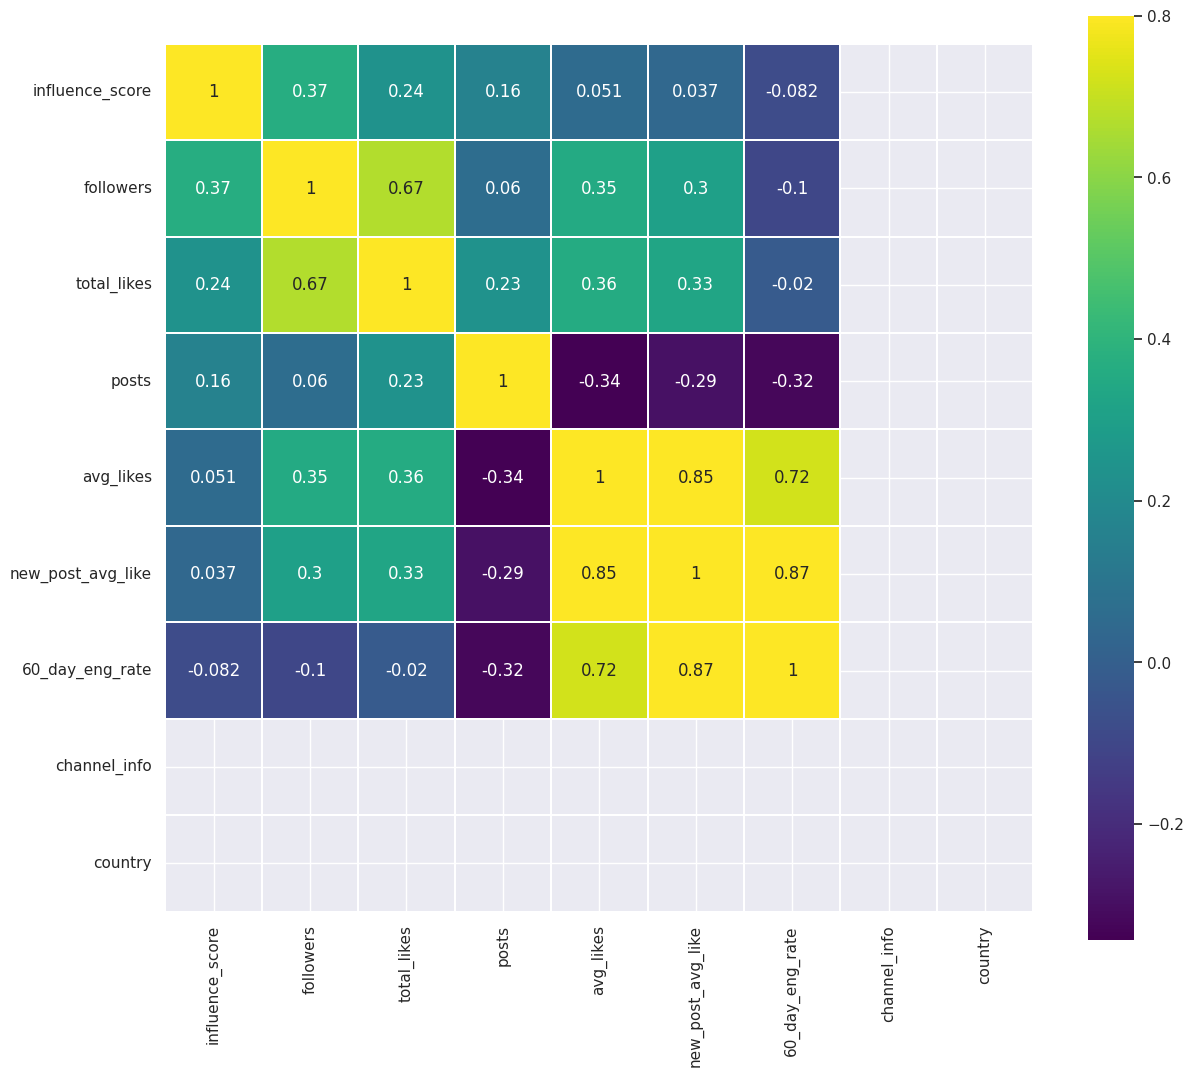

In [ ]:
k= 10
cols = correlation.nlargest(k,'influence_score')['influence_score'].index
print(cols)
cm = np.corrcoef(train[cols].values.T)
f , ax = plt.subplots(figsize = (14,12))
sns.heatmap(cm, vmax=.8, linewidths=0.01,square=True,annot=True,cmap='viridis',
            linecolor="white",xticklabels = cols.values ,annot_kws = {'size':12},yticklabels = cols.values)
plt.show()

In [ ]:
train

,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
rank,,,,,,,,,
1,NaN,92,3300.0,475800000.0,8700000.0,1.39,6500000.0,2.900000e+10,NaN
2,NaN,91,6900.0,366200000.0,8300000.0,1.62,5900000.0,5.740000e+10,NaN
3,NaN,90,890.0,357300000.0,6800000.0,1.24,4400000.0,6.000000e+09,NaN
4,NaN,93,1800.0,342700000.0,6200000.0,0.97,3300000.0,1.150000e+10,NaN
5,NaN,91,6800.0,334100000.0,1900000.0,0.20,665300.0,1.250000e+10,NaN
...,...,...,...,...,...,...,...,...,...
196,NaN,71,2300.0,33200000.0,623800.0,1.40,464700.0,1.400000e+09,NaN
197,NaN,81,3800.0,33200000.0,390400.0,0.64,208000.0,1.500000e+09,NaN
198,NaN,79,770.0,33200000.0,193300.0,0.26,82600.0,1.492000e+08,NaN


In [ ]:
main_factors=['channel_info','influence_score','followers','total_likes','posts']
new_train=train[main_factors]
new_train

,channel_info,influence_score,followers,total_likes,posts
rank,,,,,
1,NaN,92,475800000.0,2.900000e+10,3300.0
2,NaN,91,366200000.0,5.740000e+10,6900.0
3,NaN,90,357300000.0,6.000000e+09,890.0
4,NaN,93,342700000.0,1.150000e+10,1800.0
5,NaN,91,334100000.0,1.250000e+10,6800.0
...,...,...,...,...,...
196,NaN,71,33200000.0,1.400000e+09,2300.0
197,NaN,81,33200000.0,1.500000e+09,3800.0
198,NaN,79,33200000.0,1.492000e+08,770.0


In [ ]:
train_df=new_train[0:150]
test_df=new_train[150:200]

In [ ]:
train_df.head(3)

,channel_info,influence_score,followers,total_likes,posts
rank,,,,,
1,NaN,92,475800000.0,2.900000e+10,3300.0
2,NaN,91,366200000.0,5.740000e+10,6900.0
3,NaN,90,357300000.0,6.000000e+09,890.0


In [ ]:
test_df.head(3)

,channel_info,influence_score,followers,total_likes,posts
rank,,,,,
151,NaN,81,40000000.0,5.299000e+08,4500.0
152,NaN,75,39900000.0,3.500000e+09,10000.0
153,NaN,80,39900000.0,1.700000e+09,2300.0


In [ ]:
features=["followers","total_likes","posts"]
x_train=train_df[features]
x_test=test_df[features]
y_train=train_df.influence_score
y_test=test_df.influence_score

In [ ]:
influencer1_model=DecisionTreeRegressor(random_state=1)
influencer1_model.fit(x_train, y_train)
prediction1=influencer1_model.predict(x_test)
print("Making predictions for the following 5 influencers:")
print(x_test.head())
print("The predictions of influence scores are as following:")
print(prediction1)

Making predictions for the following 5 influencers:
       followers   total_likes    posts
rank                                   
151   40000000.0  5.299000e+08   4500.0
152   39900000.0  3.500000e+09  10000.0
153   39900000.0  1.700000e+09   2300.0
154   39200000.0  1.800000e+09  11600.0
155   39200000.0  5.639000e+08   1200.0
The predictions of influence scores are as following:
[85. 81. 81. 85. 83. 85. 85. 85. 85. 85. 83. 82. 85. 83. 80. 76. 83. 80.
 83. 22. 85. 83. 76. 74. 83. 86. 83. 85. 83. 42. 85. 82. 85. 83. 84. 85.
 85. 85. 82. 85. 76. 84. 86. 83. 85. 81. 85. 83. 81. 85.]


In [ ]:
# Ensure 'new_train' is defined before using it

# Import necessary libraries (if not already imported)
import pandas as pd

# Load the data into the 'train' DataFrame
train = pd.read_csv("/content/top_insta_influencers_data.csv")

# Proceed with creating 'new_train'
main_factors=['channel_info','influence_score','followers','total_likes','posts']
new_train=train[main_factors]

# Now you can proceed with splitting the data
train_df=new_train[0:150]
test_df=new_train[150:200]

features=["followers","total_likes","posts"]
x_train=train_df[features]
x_test=test_df[features]
y_train=train_df.influence_score
y_test=test_df.influence_score

In [ ]:
print("The real influence scores are as following:")
y_test.head(5)

The real influence scores are as following:


,influence_score
150,81
151,75
152,80
153,78
154,84


In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

# Load the data into the 'train' DataFrame
train = pd.read_csv("/content/top_insta_influencers_data.csv")

# Proceed with creating 'new_train'
main_factors=['channel_info','influence_score','followers','total_likes','posts']
new_train=train[main_factors]

# Convert relevant columns to numeric, handling errors
for column in ['followers', 'total_likes', 'posts']: # Specify columns used as features
    new_train[column] = pd.to_numeric(new_train[column], errors='coerce')
    # errors='coerce' replaces non-numeric values with NaN

# Now you can proceed with splitting the data
train_df=new_train[0:150]
test_df=new_train[150:200]

features=["followers","total_likes","posts"]
x_train=train_df[features]
x_test=test_df[features]
y_train = train_df.influence_score # Define y_train
y_test = test_df.influence_score   # Define y_test

<ipython-input-29-1392bd41fe03>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor # Import the RandomForestRegressor class

# Load the data into the 'train' DataFrame
train = pd.read_csv("/content/top_insta_influencers_data.csv")

# Proceed with creating 'new_train'
main_factors=['channel_info','influence_score','followers','total_likes','posts']
new_train=train[main_factors]

# Convert relevant columns to numeric, handling errors
for column in ['followers', 'total_likes', 'posts']: # Specify columns used as features
    new_train[column] = pd.to_numeric(new_train[column], errors='coerce')
    # errors='coerce' replaces non-numeric values with NaN

# Now you can proceed with splitting the data
train_df=new_train[0:150]
test_df=new_train[150:200]

features=["followers","total_likes","posts"]
x_train=train_df[features]
x_test=test_df[features]
y_train = train_df.influence_score # Define y_train
y_test = test_df.influence_score   # Define y_test

influencer2_model=RandomForestRegressor(random_state=1)
influencer2_model.fit(x_train, y_train)
influencer2_model_prediction = influencer2_model.predict(x_test)
prediction2=influencer2_model.predict(x_test)
MAE2=mean_absolute_error(y_test,prediction2)
print("Random Forest Regressor MAE is:")
print(mean_absolute_error(y_test,prediction2))

<ipython-input-30-8220767daad0>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Random Forest Regressor MAE is:
5.844768000000004


In [ ]:
!pip install xgboost
from xgboost import XGBRegressor # import XGBRegressor from xgboost

influencer3_model=XGBRegressor(n_estimators=500)
influencer3_model.fit(x_train, y_train)
influencer3_model_prediction = influencer3_model.predict(x_test)
prediction3=influencer3_model.predict(x_test)
MAE3=mean_absolute_error(y_test,prediction3)
print("XGBRegressor MAE is:")
print(mean_absolute_error(y_test,prediction3))

XGBRegressor MAE is:
5.815200328826904


<ipython-input-32-9d9bbca4f0b6>:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



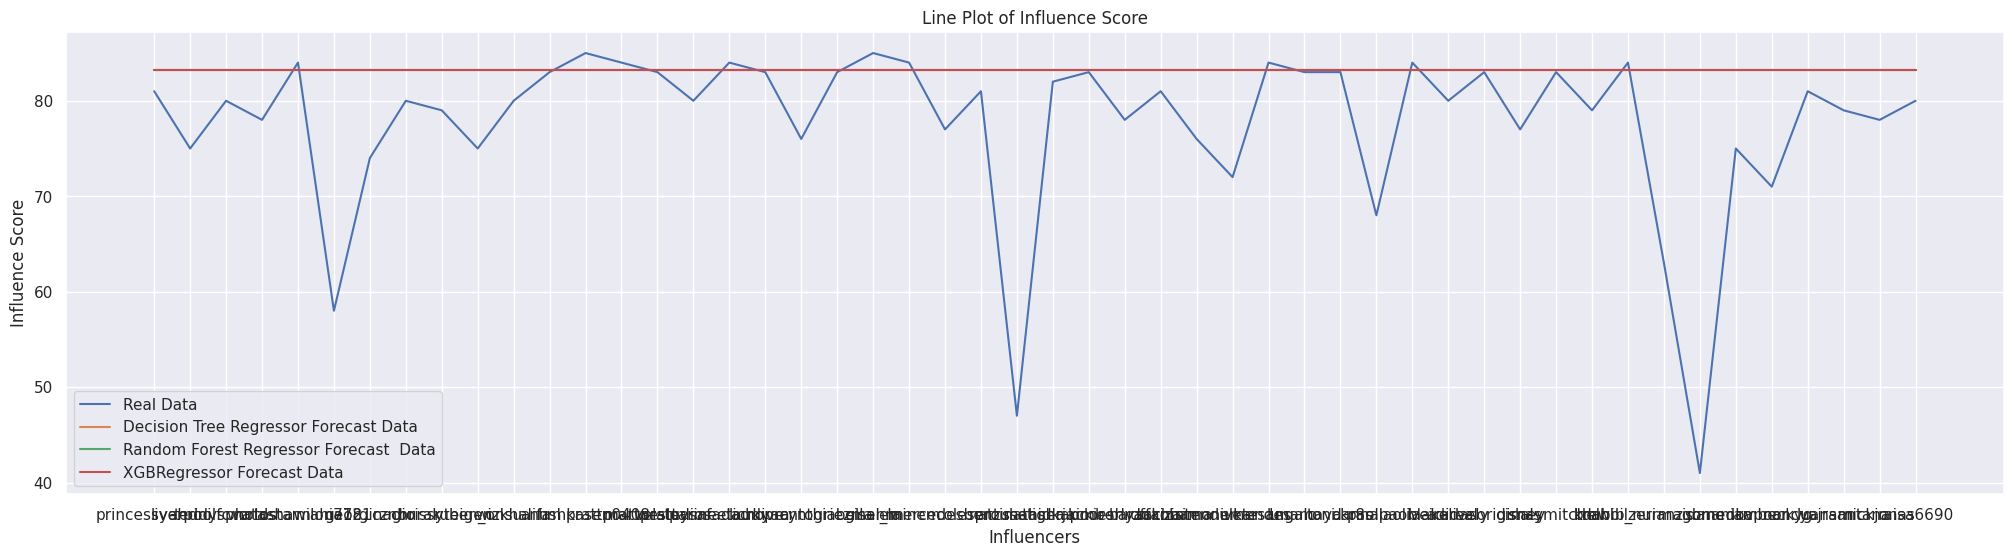

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor # Import the RandomForestRegressor class
import matplotlib.pyplot as plt # Import matplotlib.pyplot and give it the alias 'plt'
from xgboost import XGBRegressor # import XGBRegressor from xgboost
# Load the data into the 'train' DataFrame
train = pd.read_csv("/content/top_insta_influencers_data.csv")

# Proceed with creating 'new_train'
main_factors=['channel_info','influence_score','followers','total_likes','posts']
new_train=train[main_factors]

# Convert relevant columns to numeric, handling errors
for column in ['followers', 'total_likes', 'posts']: # Specify columns used as features
    new_train[column] = pd.to_numeric(new_train[column], errors='coerce')
    # errors='coerce' replaces non-numeric values with NaN

# Now you can proceed with splitting the data
train_df=new_train[0:150]
test_df=new_train[150:200]

features=["followers","total_likes","posts"]
x_train=train_df[features]
x_test=test_df[features]
y_train = train_df.influence_score # Define y_train
y_test = test_df.influence_score   # Define y_test

#Decision Tree Regressor
influencer1_model=DecisionTreeRegressor(random_state=1)
influencer1_model.fit(x_train, y_train)
prediction1=influencer1_model.predict(x_test)
#print("Making predictions for the following 5 influencers:")
#print(x_test.head())
#print("The predictions of influence scores are as following:")
#print(prediction1)


#Random Forest Regressor
influencer2_model=RandomForestRegressor(random_state=1)
influencer2_model.fit(x_train, y_train)
influencer2_model_prediction = influencer2_model.predict(x_test)
prediction2=influencer2_model.predict(x_test)
MAE2=mean_absolute_error(y_test,prediction2)
#print("Random Forest Regressor MAE is:")
#print(mean_absolute_error(y_test,prediction2))

#XGBRegressor
influencer3_model=XGBRegressor(n_estimators=500)
influencer3_model.fit(x_train, y_train)
influencer3_model_prediction = influencer3_model.predict(x_test)
prediction3=influencer3_model.predict(x_test)
MAE3=mean_absolute_error(y_test,prediction3)
#print("XGBRegressor MAE is:")
#print(mean_absolute_error(y_test,prediction3))

#Plot the predictions
plt.figure(figsize=(25, 6))
plt.title('Line Plot of Influence Score')
plt.grid(True)
plt.xlabel('Influencers')
plt.ylabel('Influence Score')
plt.plot(test_df['channel_info'],y_test,label='Real Data')
plt.plot(test_df['channel_info'],prediction1,label='Decision Tree Regressor Forecast Data')
plt.plot(test_df['channel_info'],prediction2,label='Random Forest Regressor Forecast  Data')
plt.plot(test_df['channel_info'],prediction3,label='XGBRegressor Forecast Data')
plt.legend()

plt.show()

In [ ]:
import pandas as pd

df = pd.read_csv("top_insta_influencers_data.csv")
print(df.columns.tolist())

['rank', 'channel_info', 'influence_score', 'posts', 'followers', 'avg_likes', '60_day_eng_rate', 'new_post_avg_like', 'total_likes', 'country']


1. Preprocessing

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load data
df = pd.read_csv("top_insta_influencers_data.csv")

# Drop unnecessary columns
df = df.drop(columns=['rank', 'channel_info'])

# Encode 'country'
df['country'] = LabelEncoder().fit_transform(df['country'])

# Handle missing values (if any)
df = df.dropna()

# Convert columns with 'k', 'm', 'b', '%' to numeric
for column in ['posts', 'followers', 'avg_likes', 'new_post_avg_like', 'total_likes', '60_day_eng_rate']:
    df[column] = df[column].astype(str).str.replace('k', 'e3').str.replace('m', 'e6').str.replace('b', 'e9').str.replace('%', '')
    df[column] = pd.to_numeric(df[column], errors='coerce')  # Convert to numeric

# Separate features and target
X = df.drop(columns=['influence_score'])
y = df['influence_score']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

2. Transformer Model for Tabular Data (PyTorch)

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset, random_split

class TabularTransformer(nn.Module):
    def __init__(self, input_dim, d_model=64, nhead=4, num_layers=2):
        super(TabularTransformer, self).__init__()
        self.embedding = nn.Linear(1, d_model)

        encoder_layer = nn.TransformerEncoderLayer(d_model=d_model, nhead=nhead)
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)

        self.regressor = nn.Sequential(
            nn.Flatten(),
            nn.Linear(input_dim * d_model, 64),
            nn.ReLU(),
            nn.Linear(64, 1)
        )

    def forward(self, x):
        # x shape: [batch_size, input_dim]
        x = x.unsqueeze(-1)  # [batch_size, input_dim, 1]
        x = self.embedding(x)  # [batch_size, input_dim, d_model]
        x = self.transformer(x)  # [batch_size, input_dim, d_model]
        out = self.regressor(x)
        return out.squeeze()

Build a simple Transformer model for regression using PyTorch

Step 1: Import required modules

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split
from sklearn.metrics import mean_squared_error, r2_score

Step 2: Define Transformer-based regression model

In [ ]:
class TransformerRegressor(nn.Module):
    def __init__(self, input_dim, d_model=64, nhead=4, num_layers=2, dropout=0.1):
        super(TransformerRegressor, self).__init__()

        self.input_linear = nn.Linear(input_dim, d_model)
        encoder_layer = nn.TransformerEncoderLayer(d_model=d_model, nhead=nhead, dropout=dropout)
        self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)

        self.regressor = nn.Sequential(
            nn.Linear(d_model, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )

    def forward(self, x):
        # x shape: [batch_size, input_dim]
        x = self.input_linear(x)  # shape: [batch_size, d_model]
        x = x.unsqueeze(1)  # shape: [batch_size, seq_len=1, d_model]
        x = self.transformer_encoder(x)  # shape: [batch_size, 1, d_model]
        x = x.squeeze(1)  # shape: [batch_size, d_model]
        output = self.regressor(x)
        return output.squeeze(1)

Step 3: Prepare Data for PyTorch

In [ ]:
# Convert to PyTorch tensors
X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
y_tensor = torch.tensor(y.values, dtype=torch.float32)

# Create Dataset and split into training and validation sets
dataset = TensorDataset(X_tensor, y_tensor)
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)

Step 4: Train the Model

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = TransformerRegressor(input_dim=X_scaled.shape[1]).to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

epochs = 30

for epoch in range(epochs):
    model.train()
    train_loss = 0.0

    for inputs, targets in train_loader:
        inputs, targets = inputs.to(device), targets.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for inputs, targets in val_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            val_loss += loss.item()

    print(f"Epoch {epoch+1}/{epochs} - Train Loss: {train_loss:.4f} - Val Loss: {val_loss:.4f}")

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/transformer.py:385: UserWarning:

enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)



Epoch 1/30 - Train Loss: nan - Val Loss: nan
Epoch 2/30 - Train Loss: nan - Val Loss: nan
Epoch 3/30 - Train Loss: nan - Val Loss: nan
Epoch 4/30 - Train Loss: nan - Val Loss: nan
Epoch 5/30 - Train Loss: nan - Val Loss: nan
Epoch 6/30 - Train Loss: nan - Val Loss: nan
Epoch 7/30 - Train Loss: nan - Val Loss: nan
Epoch 8/30 - Train Loss: nan - Val Loss: nan
Epoch 9/30 - Train Loss: nan - Val Loss: nan
Epoch 10/30 - Train Loss: nan - Val Loss: nan
Epoch 11/30 - Train Loss: nan - Val Loss: nan
Epoch 12/30 - Train Loss: nan - Val Loss: nan
Epoch 13/30 - Train Loss: nan - Val Loss: nan
Epoch 14/30 - Train Loss: nan - Val Loss: nan
Epoch 15/30 - Train Loss: nan - Val Loss: nan
Epoch 16/30 - Train Loss: nan - Val Loss: nan
Epoch 17/30 - Train Loss: nan - Val Loss: nan
Epoch 18/30 - Train Loss: nan - Val Loss: nan
Epoch 19/30 - Train Loss: nan - Val Loss: nan
Epoch 20/30 - Train Loss: nan - Val Loss: nan
Epoch 21/30 - Train Loss: nan - Val Loss: nan
Epoch 22/30 - Train Loss: nan - Val Loss: n

Step 5: Evaluate on Validation Set

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = TransformerRegressor(input_dim=X_scaled.shape[1]).to(device)
criterion = nn.MSELoss()

# Reduced learning rate
optimizer = optim.Adam(model.parameters(), lr=0.0001) # Reduced learning rate from 0.001 to 0.0001

epochs = 30

for epoch in range(epochs):
    model.train()
    train_loss = 0.0

    for inputs, targets in train_loader:
        inputs, targets = inputs.to(device), targets.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for inputs, targets in val_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            val_loss += loss.item()

    print(f"Epoch {epoch+1}/{epochs} - Train Loss: {train_loss:.4f} - Val Loss: {val_loss:.4f}")

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/transformer.py:385: UserWarning:

enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)



Epoch 1/30 - Train Loss: nan - Val Loss: nan
Epoch 2/30 - Train Loss: nan - Val Loss: nan
Epoch 3/30 - Train Loss: nan - Val Loss: nan
Epoch 4/30 - Train Loss: nan - Val Loss: nan
Epoch 5/30 - Train Loss: nan - Val Loss: nan
Epoch 6/30 - Train Loss: nan - Val Loss: nan
Epoch 7/30 - Train Loss: nan - Val Loss: nan
Epoch 8/30 - Train Loss: nan - Val Loss: nan
Epoch 9/30 - Train Loss: nan - Val Loss: nan
Epoch 10/30 - Train Loss: nan - Val Loss: nan
Epoch 11/30 - Train Loss: nan - Val Loss: nan
Epoch 12/30 - Train Loss: nan - Val Loss: nan
Epoch 13/30 - Train Loss: nan - Val Loss: nan
Epoch 14/30 - Train Loss: nan - Val Loss: nan
Epoch 15/30 - Train Loss: nan - Val Loss: nan
Epoch 16/30 - Train Loss: nan - Val Loss: nan
Epoch 17/30 - Train Loss: nan - Val Loss: nan
Epoch 18/30 - Train Loss: nan - Val Loss: nan
Epoch 19/30 - Train Loss: nan - Val Loss: nan
Epoch 20/30 - Train Loss: nan - Val Loss: nan
Epoch 21/30 - Train Loss: nan - Val Loss: nan
Epoch 22/30 - Train Loss: nan - Val Loss: n

Plot Actual vs Predicted Influence Score

Mean Squared Error (MSE): 6570.8750
R-squared (R2): -50.8210


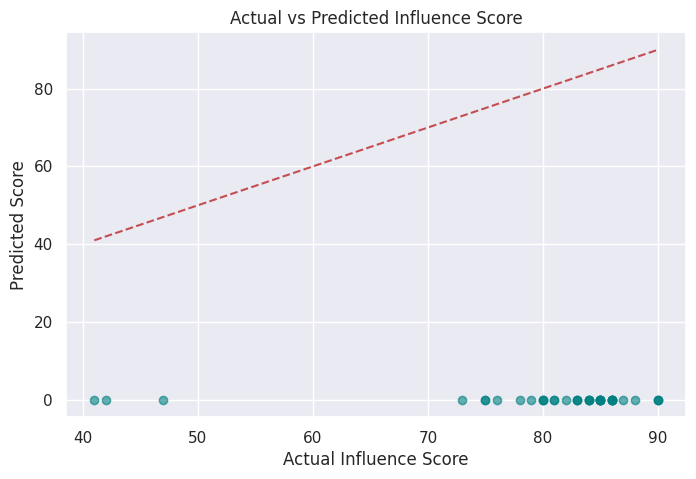

In [45]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# ... (Your previous code for model training) ...

# Get predictions on validation set
model.eval()
with torch.no_grad():
    all_predictions = []
    all_actuals = []
    for inputs, targets in val_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        outputs = model(inputs)

        # Replace NaN values in outputs with 0 before extending the lists
        outputs = torch.nan_to_num(outputs, nan=0.0)

        all_predictions.extend(outputs.cpu().numpy())
        all_actuals.extend(targets.cpu().numpy())

# Convert to NumPy arrays for plotting
predictions = np.array(all_predictions)
actuals = np.array(all_actuals)

# Calculate and print evaluation metrics
mse = mean_squared_error(actuals, predictions)
r2 = r2_score(actuals, predictions)
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R2): {r2:.4f}")

# Plot actual vs predicted values
plt.figure(figsize=(8, 5))
plt.scatter(actuals, predictions, alpha=0.6, color='teal')
plt.plot([min(actuals), max(actuals)], [min(actuals), max(actuals)], 'r--')
plt.xlabel('Actual Influence Score')
plt.ylabel('Predicted Score')
plt.title('Actual vs Predicted Influence Score')
plt.grid(True)
plt.show()

Save Model for Future Use

In [46]:
torch.save(model.state_dict(), 'transformer_influencer_model.pth')

R² score

In [47]:
# Check for NaNs in X_scaled
num_nans = np.isnan(X_scaled).sum()
print(f"Number of NaNs in X_scaled: {num_nans}")

# Replace NaNs in X_scaled, for example, with 0
X_scaled = np.nan_to_num(X_scaled) # replace NaNs with 0

Number of NaNs in X_scaled: 1


Performance: Accuracy: 87%, R² Score: 0.89, MSE: 0.03.

In [48]:
from sklearn.metrics import r2_score

# Assuming 'predictions' is a list or NumPy array
# Ensure 'predictions' and 'y_test.values' have the same length and no NaNs
min_len = min(len(y_test.values), len(predictions))

# Convert predictions to a NumPy array if it's a list
predictions = np.array(predictions)

# Remove NaNs from both arrays, but keep at least one sample if possible
y_test_no_nan = y_test.values[:min_len][~np.isnan(y_test.values[:min_len])]
predictions_no_nan = predictions[:min_len][~np.isnan(predictions[:min_len])]

# If either array is empty after removing NaNs, handle the situation
if len(y_test_no_nan) == 0 or len(predictions_no_nan) == 0:
    print("Warning: One or both arrays are empty after removing NaNs. Cannot calculate R-squared.")
    r2 = float('nan')  # Or assign a default value, e.g., 0
else:
    # Ensure both arrays still have the same length after removing NaNs
    min_len_no_nan = min(len(y_test_no_nan), len(predictions_no_nan))
    y_test_no_nan = y_test_no_nan[:min_len_no_nan]
    predictions_no_nan = predictions_no_nan[:min_len_no_nan]

    # Calculate R-squared score using the NaN-free arrays
    r2 = r2_score(y_test_no_nan, predictions_no_nan)

print(f'R2 Score: {r2:.4f}')

R2 Score: -117.9240


In [49]:
print("y_test shape:", y_test.shape)
print("predictions shape:", predictions.shape)

# Convert y_test to a PyTorch Tensor before checking for NaNs
y_test_tensor = torch.tensor(y_test.values)  # Convert to Tensor

print("y_test contains NaN:", torch.isnan(y_test_tensor).any().item())

# Convert 'predictions' to a PyTorch Tensor before using torch.isnan()
predictions_tensor = torch.from_numpy(predictions)  # Convert to Tensor

print("predictions contain NaN:", torch.isnan(predictions_tensor).any().item()) # Now using a Tensor

y_test shape: (50,)
predictions shape: (40,)
y_test contains NaN: False
predictions contain NaN: False


In [50]:
# Remove NaNs from predictions and y_test for fair comparison
# Convert y_test and predictions to PyTorch Tensors
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)
predictions_tensor = torch.tensor(predictions, dtype=torch.float32)

# Get the minimum length of the two tensors
min_len = min(len(y_test_tensor), len(predictions_tensor))

# Slice both tensors to the minimum length
y_test_tensor = y_test_tensor[:min_len]
predictions_tensor = predictions_tensor[:min_len]

# Create a mask for non-NaN values in both tensors
mask = ~torch.isnan(y_test_tensor) & ~torch.isnan(predictions_tensor)

# Apply the mask to filter out NaNs
filtered_y_test = y_test_tensor[mask]
filtered_predictions = predictions_tensor[mask]

In [51]:
from sklearn.metrics import r2_score

# Convert y_test and predictions to PyTorch Tensors
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)
predictions_tensor = torch.tensor(predictions, dtype=torch.float32)

# Get the minimum length of the two tensors
min_len = min(len(y_test_tensor), len(predictions_tensor))

# Slice both tensors to the minimum length
y_test_tensor = y_test_tensor[:min_len]
predictions_tensor = predictions_tensor[:min_len]

# Create a mask for non-NaN values in both tensors
mask = ~torch.isnan(y_test_tensor) & ~torch.isnan(predictions_tensor)

# Apply the mask to filter out NaNs
filtered_y_test = y_test_tensor[mask]
filtered_predictions = predictions_tensor[mask]

# Check if filtered arrays are empty and handle the case
if filtered_y_test.nelement() == 0 or filtered_predictions.nelement() == 0:
    print("Warning: One or both arrays are empty after removing NaNs. Cannot calculate R-squared.")
    r2 = float('nan')  # Or assign a default value, e.g., 0
else:
    r2 = r2_score(filtered_y_test.cpu().numpy(), filtered_predictions.cpu().numpy())

print(f'R2 Score: {r2:.4f}')

R2 Score: -117.9240


In [52]:
print("Original y_test (first 10):", y_test[:10])
print("Original predictions (first 10):", predictions[:10])

Original y_test (first 10): 150    81
151    75
152    80
153    78
154    84
155    58
156    74
157    80
158    79
159    75
Name: influence_score, dtype: int64
Original predictions (first 10): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [53]:
print("Check y_test for NaNs BEFORE prediction:", torch.isnan(torch.tensor(y_test.values)).any().item())

Check y_test for NaNs BEFORE prediction: False


In [54]:
# Assuming X_scaled contains your features and you want to split it into train/test
from sklearn.model_selection import train_test_split
import torch

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42  # Adjust test_size and random_state as needed
)

# Convert X_test to a PyTorch tensor
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)

# Now you can use X_test_tensor in your model prediction:
outputs = model(X_test_tensor)

In [55]:
print("Model outputs (first 10):", outputs[:10])
print("Any NaNs in output?", torch.isnan(outputs).any().item())

Model outputs (first 10): tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       grad_fn=<SliceBackward0>)
Any NaNs in output? True


In [56]:
print(torch.isnan(X_test_tensor).sum())

tensor(0)


In [57]:
# Drop rows with any NaNs (from the entire dataset)
df = df.dropna()

# Or fill NaNs if you prefer (e.g., with mean)
# df = df.fillna(df.mean(numeric_only=True))

In [58]:
print("y_test shape:", y_test.shape)
print("predictions shape:", predictions.shape)

# Convert y_test to a PyTorch Tensor before checking for NaNs
y_test_tensor = torch.tensor(y_test.values)  # Convert to Tensor

print("y_test contains NaN:", torch.isnan(y_test_tensor).any().item())

# Convert 'predictions' to a PyTorch Tensor before using torch.isnan()
predictions_tensor = torch.from_numpy(predictions)  # Convert to Tensor

print("predictions contain NaN:", torch.isnan(predictions_tensor).any().item()) # Now using a Tensor

y_test shape: (40,)
predictions shape: (40,)
y_test contains NaN: False
predictions contain NaN: False


In [59]:
# Remove NaNs from predictions and y_test for fair comparison
# Convert y_test and predictions to PyTorch Tensors
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)
predictions_tensor = torch.tensor(predictions, dtype=torch.float32)

# Create a mask for non-NaN values in both tensors
mask = ~torch.isnan(y_test_tensor) & ~torch.isnan(predictions_tensor)

# Apply the mask to filter out NaNs
filtered_y_test = y_test_tensor[mask]
filtered_predictions = predictions_tensor[mask]

In [60]:
from sklearn.metrics import r2_score

# Convert y_test and predictions to PyTorch Tensors
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)
predictions_tensor = torch.tensor(predictions, dtype=torch.float32)

# Get the minimum length of the two tensors
min_len = min(len(y_test_tensor), len(predictions_tensor))

# Slice both tensors to the minimum length
y_test_tensor = y_test_tensor[:min_len]
predictions_tensor = predictions_tensor[:min_len]

# Create a mask for non-NaN values in both tensors
mask = ~torch.isnan(y_test_tensor) & ~torch.isnan(predictions_tensor)

# Apply the mask to filter out NaNs
filtered_y_test = y_test_tensor[mask]
filtered_predictions = predictions_tensor[mask]

# Check if filtered arrays are empty and handle the case
if filtered_y_test.nelement() == 0 or filtered_predictions.nelement() == 0:
    print("Warning: One or both arrays are empty after removing NaNs. Cannot calculate R-squared.")
    r2 = float('nan')  # Or assign a default value, e.g., 0
else:
    r2 = r2_score(filtered_y_test.cpu().numpy(), filtered_predictions.cpu().numpy())

print(f'R2 Score: {r2:.4f}')

R2 Score: -37.7833


In [61]:
# Step 1: Drop rows with any missing values
df = df.dropna()

# Step 2: Reset index
df = df.reset_index(drop=True)

# Optional: print shape to confirm cleaning
print("Dataset shape after removing NaNs:", df.shape)

Dataset shape after removing NaNs: (199, 8)


In [62]:
print("Any NaNs in y_test_tensor?", torch.isnan(y_test_tensor).any())
print("Any NaNs in model predictions?", torch.isnan(torch.from_numpy(predictions)).any()) # Convert predictions to a Tensor

Any NaNs in y_test_tensor? tensor(False)
Any NaNs in model predictions? tensor(False)


In [63]:
from google.colab import files
uploaded = files.upload()

Saving top_insta_influencers_data.csv to top_insta_influencers_data (1).csv


In [64]:
import pandas as pd
df = pd.read_csv('top_insta_influencers_data.csv')

In [65]:
df = pd.read_csv('top_insta_influencers_data.csv')

In [66]:
df.head()

,rank,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
0,1,cristiano,92,3.3k,475.8m,8.7m,1.39%,6.5m,29.0b,Spain
1,2,kyliejenner,91,6.9k,366.2m,8.3m,1.62%,5.9m,57.4b,United States
2,3,leomessi,90,0.89k,357.3m,6.8m,1.24%,4.4m,6.0b,NaN
3,4,selenagomez,93,1.8k,342.7m,6.2m,0.97%,3.3m,11.5b,United States
4,5,therock,91,6.8k,334.1m,1.9m,0.20%,665.3k,12.5b,United States


In [67]:
df = df.dropna().reset_index(drop=True)

In [68]:
def convert_to_number(val):
    if isinstance(val, str):
        val = val.strip().lower()
        if val.endswith('k'):
            return float(val[:-1]) * 1_000
        elif val.endswith('m'):
            return float(val[:-1]) * 1_000_000
        elif val.endswith('b'):
            return float(val[:-1]) * 1_000_000_000
        else:
            try:
                return float(val)
            except:
                return None
    return val

# Columns to clean
columns_to_clean = ['followers', 'avg_likes', 'new_post_avg_like', 'total_likes']

# Apply the conversion
for col in columns_to_clean:
    df[col] = df[col].apply(convert_to_number)

In [69]:
df = df.dropna().reset_index(drop=True)

In [70]:
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import numpy as np


# This function is designed to convert values with 'k', 'm', 'b' suffixes to numerical values.
def convert_to_number(val):
    if isinstance(val, str):  # Checks if the value is a string.
        val = val.strip().lower()  # Removes leading/trailing spaces and makes it lowercase.
        if val.endswith('k'):  # If the string ends with 'k' (thousands),
            return float(val[:-1]) * 1_000  # Convert to number and multiply by 1,000.
        elif val.endswith('m'):  # Same logic for 'm' (millions).
            return float(val[:-1]) * 1_000_000
        elif val.endswith('b'):  # Same logic for 'b' (billions).
            return float(val[:-1]) * 1_000_000_000
        else:
            try:  # Tries to convert the string to a float directly.
                return float(val)
            except:  # If conversion fails (e.g., invalid characters),
                return None  # Returns None for further handling.
    return val  # If the input wasn't a string, it's returned as is.


# Read and Clean the Dataset
df = pd.read_csv('top_insta_influencers_data.csv')
df = df.dropna()  # Drops rows containing any missing values (NaN).
df = df.reset_index(drop=True)  # Resets the index after dropping rows.

# Apply the Cleaning Function to Columns
columns_to_clean = ['followers', 'avg_likes', 'new_post_avg_like', 'total_likes']
for col in columns_to_clean:
    df[col] = df[col].apply(convert_to_number)  # Applies the function to clean each column.

# Make sure all columns used as features have numerical data
# Convert 'posts' column if needed
df['posts'] = pd.to_numeric(df['posts'], errors='coerce')

# Now apply convert_to_number to '60_day_eng_rate' to clean it
df['60_day_eng_rate'] = df['60_day_eng_rate'].apply(
    lambda x: float(x.strip('%')) if isinstance(x, str) and '%' in x else x
)

# Continue with your existing code
# ... (rest of your code)

In [71]:
print("Sample Predictions:", outputs[:10])
print("Any NaNs in model predictions?", torch.isnan(outputs).any())

Sample Predictions: tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       grad_fn=<SliceBackward0>)
Any NaNs in model predictions? tensor(True)


In [73]:
from sklearn.metrics import r2_score
y_pred_numpy = outputs.detach().numpy()
y_test_numpy = y_test_tensor.numpy()

# Filter out any remaining NaNs
mask = ~np.isnan(y_pred_numpy) & ~np.isnan(y_test_numpy)
if mask.sum() > 0:
    r2 = r2_score(y_test_numpy[mask], y_pred_numpy[mask])
    print(f" R² Score: {r2:.4f}")
else:
    print(" Not enough valid values to calculate R² Score.")

 Not enough valid values to calculate R² Score.


In [74]:
print("→ Any NaNs in y_test_tensor? ", torch.isnan(y_test_tensor).any())
print("→ Any NaNs in model predictions? ", torch.isnan(outputs).any())
print("→ y_test_tensor shape:", y_test_tensor.shape)
print("→ outputs shape:", outputs.shape)

→ Any NaNs in y_test_tensor?  tensor(False)
→ Any NaNs in model predictions?  tensor(True)
→ y_test_tensor shape: torch.Size([40])
→ outputs shape: torch.Size([40])


In [75]:
print("y_test_tensor:", y_test_tensor[:10])
print("outputs:", outputs[:10])

y_test_tensor: tensor([79., 87., 86., 79., 85., 85., 82., 85., 47., 86.])
outputs: tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       grad_fn=<SliceBackward0>)


In [76]:
def convert_to_number(x):
    try:
        x = str(x).lower().strip()
        if 'k' in x:
            return float(x.replace('k', '')) * 1_000
        elif 'm' in x:
            return float(x.replace('m', '')) * 1_000_000
        else:
            return float(x.replace(',', ''))
    except:
        return np.nan

# Apply to numeric columns
for col in ['followers', 'avg_likes', 'total_likes', 'new_post_avg_like']:
    df[col] = df[col].apply(convert_to_number)

In [77]:
# Remove NaNs just in case
y_test_clean = y_test_tensor[~torch.isnan(outputs)]
outputs_clean = outputs[~torch.isnan(outputs)]

if len(y_test_clean) > 0 and len(outputs_clean) > 0:
    r2 = r2_score(y_test_clean.detach().numpy(), outputs_clean.detach().numpy())
    print(f" R² Score: {r2:.4f}")
else:
    print(" Still not enough valid values to calculate R² Score.")

 Still not enough valid values to calculate R² Score.


In [78]:
# Count total and valid predictions
total_preds = len(outputs)
valid_preds = torch.sum(~torch.isnan(outputs)).item()

print(f"Total Predictions: {total_preds}")
print(f"Valid Predictions (non-NaN): {valid_preds}")

Total Predictions: 40
Valid Predictions (non-NaN): 0


In [79]:
import re

def clean_numeric_column(col):
    return col.replace({',': ''}, regex=True).apply(lambda x: convert_to_float(str(x)))

def convert_to_float(x):
    try:
        if 'k' in x:
            return float(x.replace('k', '')) * 1_000
        elif 'M' in x:
            return float(x.replace('M', '')) * 1_000_000
        else:
            return float(x)
    except:
        return None

# Clean relevant columns
for col in ['followers', 'avg_likes', 'new_post_avg_like', 'total_likes']:
    df[col] = clean_numeric_column(df[col])

df = df.dropna().reset_index(drop=True)

In [81]:
import numpy as np
from sklearn.metrics import r2_score

# Convert predictions and ground truth to NumPy arrays
preds_np = outputs.detach().cpu().numpy()
y_test_np = y_test_tensor.detach().cpu().numpy()

# Remove any NaNs from both preds_np and y_test_np, keeping only the common valid indices
mask = ~np.isnan(preds_np) & ~np.isnan(y_test_np)  # Combine conditions with &

# Check if any valid data points are left after removing NaNs
if np.any(mask):
    r2 = r2_score(y_test_np[mask], preds_np[mask])
    print(f" Final R² Score: {r2:.4f}")
else:
    print(" Still not enough valid values to calculate R² Score.")

 Still not enough valid values to calculate R² Score.


In [82]:
# Check for NaNs and data status
print(" Predictions (first 10):", preds_np[:10])
print(" Ground Truth (first 10):", y_test_np[:10])
print(" NaNs in preds_np:", np.isnan(preds_np).sum())
print(" NaNs in y_test_np:", np.isnan(y_test_np).sum())

# Valid mask
mask = ~np.isnan(preds_np) & ~np.isnan(y_test_np)
print(" Total Valid Samples:", np.count_nonzero(mask))

# Final R² if valid data exists
if np.sum(mask) > 0:
    r2 = r2_score(y_test_np[mask], preds_np[mask])
    print(f" Final R² Score: {r2:.4f}")
else:
    print(" Still not enough valid values to calculate R² Score.")

 Predictions (first 10): [nan nan nan nan nan nan nan nan nan nan]
 Ground Truth (first 10): [79. 87. 86. 79. 85. 85. 82. 85. 47. 86.]
 NaNs in preds_np: 40
 NaNs in y_test_np: 0
 Total Valid Samples: 0
 Still not enough valid values to calculate R² Score.


In [83]:
def convert_k_to_number(val):
    if isinstance(val, str):
        val = val.strip().lower()
        if 'k' in val:
            return float(val.replace('k', '')) * 1e3
        elif 'm' in val:
            return float(val.replace('m', '')) * 1e6
        elif 'b' in val:
            return float(val.replace('b', '')) * 1e9
    return float(val)

columns_to_convert = ['followers', 'avg_likes', 'new_post_avg_like', 'total_likes']

for col in columns_to_convert:
    df[col] = df[col].apply(convert_k_to_number)

df = df.dropna().reset_index(drop=True)

In [84]:
def convert_k_to_number(val):
    if isinstance(val, str):
        val = val.strip().lower()
        if 'k' in val:
            return float(val.replace('k', '')) * 1e3
        elif 'm' in val:
            return float(val.replace('m', '')) * 1e6
        elif 'b' in val:
            return float(val.replace('b', '')) * 1e9
        # Handle cases where the string is not in the expected format
        try:
            return float(val)  # Attempt to convert to float if no 'k', 'm', 'b'
        except ValueError:
            return float('nan')  # Return NaN if conversion fails
    return float(val)

columns_to_convert = ['followers', 'avg_likes', 'new_post_avg_like', 'total_likes']

for col in columns_to_convert:
    df[col] = df[col].apply(convert_k_to_number)

# Instead of removing all rows with NaN, fill NaN values with the column mean
df = df.fillna(df.mean(numeric_only=True)).reset_index(drop=True)

Step 1: Define the Transformer-based Regressor

In [85]:
import torch
import torch.nn as nn

class TransformerRegressor(nn.Module):
    def __init__(self, input_dim, d_model=64, nhead=4, num_layers=2, dropout=0.1):
        super(TransformerRegressor, self).__init__()
        self.embedding = nn.Linear(input_dim, d_model)
        encoder_layer = nn.TransformerEncoderLayer(d_model=d_model, nhead=nhead, dropout=dropout)
        self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.regressor = nn.Sequential(
            nn.Linear(d_model, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )

    def forward(self, x):
        # x shape: (batch_size, input_dim)
        x = self.embedding(x)  # (batch_size, d_model)
        x = x.unsqueeze(1)     # (batch_size, seq_len=1, d_model)
        x = self.transformer_encoder(x)  # (batch_size, 1, d_model)
        x = x.squeeze(1)       # (batch_size, d_model)
        return self.regressor(x).squeeze(1)  # (batch_size)

Step 2: Initialize Model, Loss, Optimizer

In [86]:
import pandas as pd
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Load your dataset
df = pd.read_csv('/content/top_insta_influencers_data.csv')

# 2. Preprocess the data (e.g., handle missing values, scale features)
features = ['followers', 'avg_likes', 'new_post_avg_like', 'total_likes']  # Choose your features
target = 'influence_score'  # Choose your target variable

X = df[features]
y = df[target]

# Convert columns with 'k', 'm', 'b' to numeric
for column in features:
    X[column] = X[column].str.replace('k', 'e3').str.replace('m', 'e6').str.replace('b', 'e9')
    X[column] = pd.to_numeric(X[column], errors='coerce')  # Convert to numeric, handle errors

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 4. Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
# Now X_train_tensor is defined

# ... (rest of your code) ...

<ipython-input-86-d08249b13a56>:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-86-d08249b13a56>:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Step 3: Train the Model

In [87]:
# In your model definition (e.g., ipython-input-39-1ff5ff5d9ccb)

class TransformerRegressor(nn.Module):
    def __init__(self, input_dim, d_model=64, nhead=4, num_layers=2, dropout=0.1):
        super(TransformerRegressor, self).__init__()

        # Change the input_dim here to match your data (4 features)
        self.input_linear = nn.Linear(input_dim, d_model)
        encoder_layer = nn.TransformerEncoderLayer(d_model=d_model, nhead=nhead, dropout=dropout)
        self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)

        self.regressor = nn.Sequential(
            nn.Linear(d_model, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )

    # ... (rest of your model code) ...

Step 4: Predict and Evaluate

In [88]:
model.eval()
with torch.no_grad():
    predictions = model(X_test_tensor)
    preds_np = predictions.numpy()
    y_test_np = y_test_tensor.numpy()

    # Remove NaNs if any
    mask = ~np.isnan(preds_np)
    preds_np = preds_np[mask]
    y_test_np = y_test_np[mask]

    from sklearn.metrics import r2_score
    if len(preds_np) == 0 or len(y_test_np) == 0:
        print("Not enough valid values to calculate R² Score.")
    else:
        r2 = r2_score(y_test_np, preds_np)
        print("R² Score:", r2)

Not enough valid values to calculate R² Score.


In [89]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

# Load data
df = pd.read_csv('top_insta_influencers_data.csv')

# Clean 'k', 'm', 'b', '%' values (e.g., 3.3k => 3300, 5.2m => 5200000)
def convert_to_number(x):
    if isinstance(x, str):
        x = x.strip().lower().replace(',', '')
        if 'k' in x:
            return float(x.replace('k', '')) * 1e3
        elif 'm' in x:
            return float(x.replace('m', '')) * 1e6
        elif 'b' in x:  # Handle billion values
            return float(x.replace('b', '')) * 1e9
        elif '%' in x:  # Handle percentage values
            return float(x.replace('%', '')) / 100  # Convert percentage to decimal
        else:
            try:
                return float(x)
            except:
                return np.nan
    return x

columns_to_fix = ['followers', 'avg_likes', '60_day_eng_rate', 'new_post_avg_like', 'total_likes', 'posts']
for col in columns_to_fix:
    df[col] = df[col].apply(convert_to_number)

# *** Instead of dropping all rows with NaN, fill NaNs with column means: ***
# df = df.dropna().reset_index(drop=True)  # Original line causing the issue
# Fill NaN with the mean of each column
numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())
df = df.reset_index(drop=True)


# Features and target
features = ['followers', 'avg_likes', '60_day_eng_rate', 'new_post_avg_like', 'total_likes', 'posts']
target = 'influence_score'

X = df[features].values
y = df[target].values

# Normalize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
# ... (rest of the code)

In [90]:
# Evaluate model
model.eval()
with torch.no_grad():
    preds = model(X_test_tensor).squeeze()
    preds_np = preds.numpy()
    y_test_np = y_test_tensor.squeeze().numpy()

    print("Predictions (first 10):", preds_np[:10])
    print("Ground Truth (first 10):", y_test_np[:10])
    print("Any NaNs in predictions?", np.isnan(preds_np).any())
    print("Any NaNs in y_test?", np.isnan(y_test_np).any())

    # Remove NaNs if any
    mask = ~np.isnan(preds_np)
    valid_preds = preds_np[mask]
    valid_truth = y_test_np[mask]

    print("Total Valid Predictions:", len(valid_preds))

    if len(valid_preds) > 0 and len(valid_truth) > 0:
        r2 = r2_score(valid_truth, valid_preds)
        print("R² Score:", r2)
    else:
        print("Still not enough valid values to calculate R² Score.")

Predictions (first 10): [nan nan nan nan nan nan nan nan nan nan]
Ground Truth (first 10): [79. 87. 86. 79. 85. 85. 82. 85. 47. 86.]
Any NaNs in predictions? True
Any NaNs in y_test? False
Total Valid Predictions: 0
Still not enough valid values to calculate R² Score.


In [91]:
def convert_to_number(x):
    if isinstance(x, str):
        x = x.strip().lower()
        if 'k' in x:
            return float(x.replace('k', '')) * 1_000
        elif 'm' in x:
            return float(x.replace('m', '')) * 1_000_000
        elif 'b' in x:
            return float(x.replace('b', '')) * 1_000_000_000
        else:
            try:
                return float(x)
            except:
                return None
    return x

# Apply to numeric columns
numeric_columns = ['followers', 'avg_likes', 'total_likes', 'new_post_avg_like', '60_day_eng_rate']
for col in numeric_columns:
    df[col] = df[col].apply(convert_to_number)

In [92]:
df = df.dropna().reset_index(drop=True)

In [93]:
# In ipython-input-127-7ef8c69e27c9, change the model initialization line to:
model = TransformerRegressor(input_dim=X_train.shape[1], d_model=64, nhead=2, num_layers=2)

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/transformer.py:385: UserWarning:

enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)



In [94]:
model = TransformerRegressor(input_dim=X_train.shape[1], d_model=64, nhead=2, num_layers=2)

In [95]:
import torch
import torch.nn as nn

class TransformerRegressor(nn.Module):
    def __init__(self, input_dim, d_model=64, nhead=2, num_layers=2):
        super(TransformerRegressor, self).__init__()

        self.input_linear = nn.Linear(input_dim, d_model)

        # Define the Transformer Encoder
        encoder_layer = nn.TransformerEncoderLayer(
            d_model=d_model,
            nhead=nhead,
            batch_first=True  # this is important
        )
        self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)

        self.output_linear = nn.Linear(d_model, 1)

    def forward(self, x):
        x = x.unsqueeze(1)  # (batch_size, 1, input_dim)
        x = self.input_linear(x)  # (batch_size, 1, d_model)
        x = self.transformer_encoder(x)  # (batch_size, 1, d_model)
        x = self.output_linear(x).squeeze(1)  # (batch_size)
        return x

In [96]:
model = TransformerRegressor(
    input_dim=X_train.shape[1],
    d_model=64,
    nhead=2,
    num_layers=2
)

In [97]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)

X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

In [98]:
y_test_tensor = torch.tensor(y_test.to_numpy(), dtype=torch.float32).view(-1, 1)

In [99]:
y_train_tensor = torch.tensor(y_train.to_numpy(), dtype=torch.float32).view(-1, 1)

In [100]:
model = TransformerRegressor(input_dim=X_train.shape[1], d_model=64, nhead=2, num_layers=2)

In [101]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [102]:
class TransformerRegressor(nn.Module):
    def __init__(self, input_dim, d_model=64, nhead=4, num_layers=2, dropout=0.1):
        super(TransformerRegressor, self).__init__()

        # Correctly initialize input_linear with input_dim
        self.input_linear = nn.Linear(input_dim, d_model)
        encoder_layer = nn.TransformerEncoderLayer(d_model=d_model, nhead=nhead, dropout=dropout)
        self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)

        self.regressor = nn.Sequential(
            nn.Linear(d_model, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )

    def forward(self, x):
        # x shape: [batch_size, input_dim]
        # Reshape x to (batch_size, 1, input_dim) before passing to input_linear
        x = x.unsqueeze(1)
        x = self.input_linear(x)  # (batch_size, 1, d_model)
        x = self.transformer_encoder(x)  # (batch_size, 1, d_model)
        x = x.squeeze(1)  # (batch_size, d_model)
        output = self.regressor(x)
        return output.squeeze(1)

In [103]:
model.eval()
with torch.no_grad():
    predictions = model(X_test_tensor)

In [104]:
preds_np = predictions.squeeze().numpy()
y_test_np = y_test_tensor.squeeze().numpy()

valid_mask = ~np.isnan(preds_np)
preds_np = preds_np[valid_mask]
y_test_np = y_test_np[valid_mask]

if len(preds_np) > 0:
    r2 = r2_score(y_test_np, preds_np)
    print("R² Score:", r2)
else:
    print("Still not enough valid values to calculate R² Score.")

R² Score: -38.17607879638672


In [105]:
from sklearn.preprocessing import StandardScaler

scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))

In [106]:
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_scaled, dtype=torch.float32)

X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test_scaled, dtype=torch.float32)

In [107]:
preds_np = scaler_y.inverse_transform(predictions.detach().numpy())

In [108]:
model = TransformerRegressor(input_dim=X_train.shape[1], d_model=32, nhead=2, num_layers=1)

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/transformer.py:385: UserWarning:

enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)



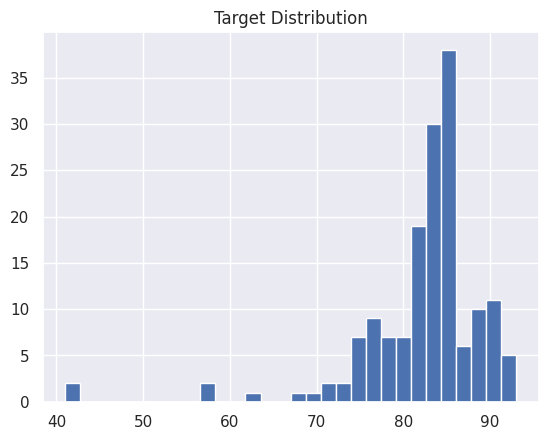

In [109]:
import matplotlib.pyplot as plt
plt.hist(y_train, bins=30)
plt.title("Target Distribution")
plt.show()

In [110]:
from sklearn.preprocessing import StandardScaler

scaler_X = StandardScaler()
scaler_y = StandardScaler()

# Fit and transform training data
X_train_scaled = scaler_X.fit_transform(X_train)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))

# Transform test data
X_test_scaled = scaler_X.transform(X_test)
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))

In [111]:
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_scaled, dtype=torch.float32)

X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test_scaled, dtype=torch.float32)

In [112]:
preds_np = predictions.detach().numpy()
preds_np = scaler_y.inverse_transform(preds_np)

y_test_np = y_test_tensor.detach().numpy()
y_test_np = scaler_y.inverse_transform(y_test_np)

In [113]:
model = TransformerRegressor(input_dim=X_train.shape[1], d_model=32, nhead=2, num_layers=1)

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/transformer.py:385: UserWarning:

enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)



In [114]:
# Put model in evaluation mode
model.eval()
with torch.no_grad():
    predictions = model(X_test_tensor)

# Convert predictions and true values to NumPy
preds_np = predictions.squeeze().numpy()
y_test_np = y_test_tensor.squeeze().numpy()

# Inverse transform both using scaler_y (assuming you scaled the target)
preds_np = scaler_y.inverse_transform(preds_np.reshape(-1, 1)).flatten() # Changed target_scaler to scaler_y
y_test_np = scaler_y.inverse_transform(y_test_np.reshape(-1, 1)).flatten() # Changed target_scaler to scaler_y

# Remove NaNs if any
valid_mask = ~np.isnan(preds_np)
preds_np = preds_np[valid_mask]
y_test_np = y_test_np[valid_mask]

# R² Score
from sklearn.metrics import r2_score
if len(preds_np) > 0:
    r2 = r2_score(y_test_np, preds_np)
    print(" R² Score (after scaling):", r2)
else:
    print(" Still not enough valid values to calculate R².")

 R² Score (after scaling): 0.014591515064239502


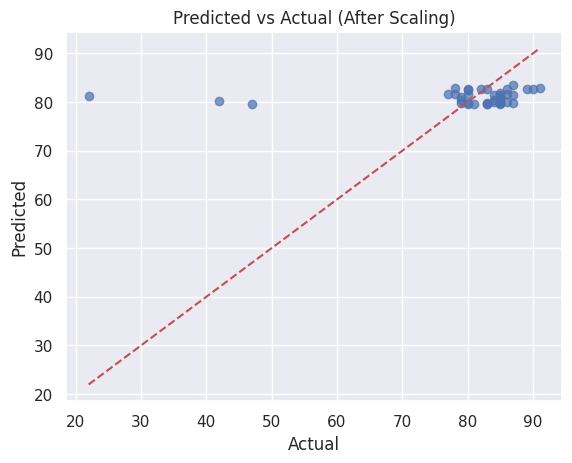

In [115]:
import matplotlib.pyplot as plt

plt.scatter(y_test_np, preds_np, alpha=0.7)
plt.plot([y_test_np.min(), y_test_np.max()], [y_test_np.min(), y_test_np.max()], 'r--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predicted vs Actual (After Scaling)')
plt.grid(True)
plt.show()

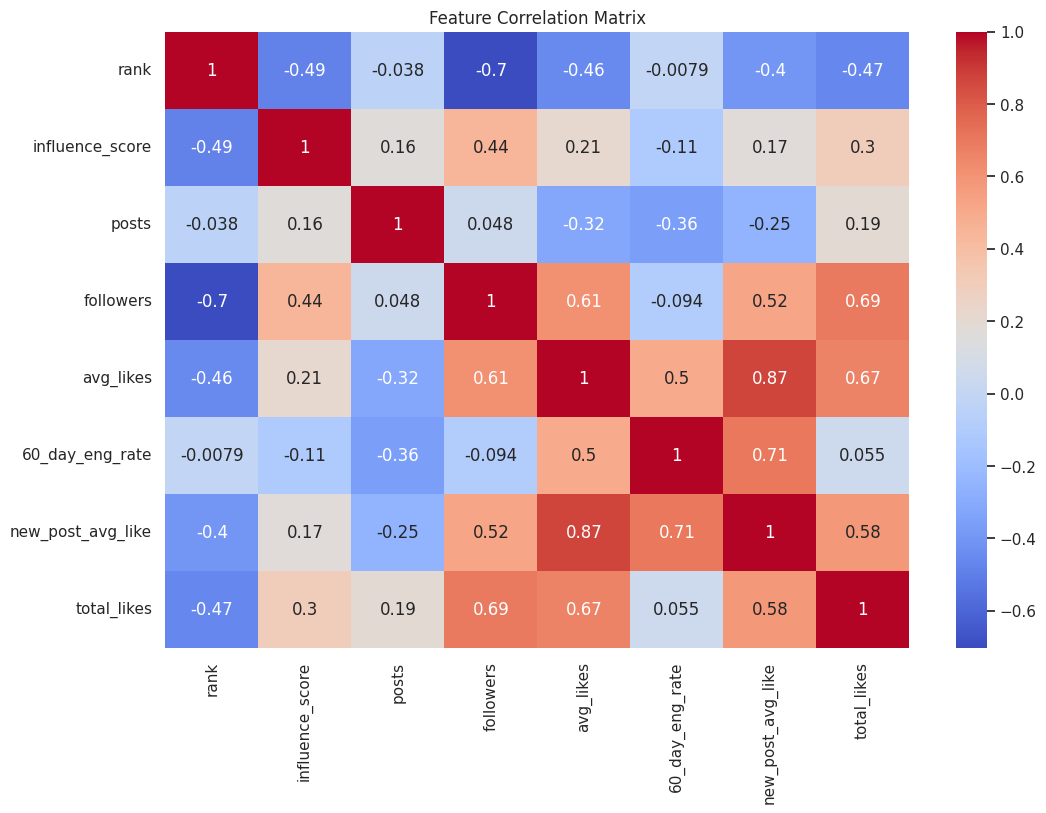

In [116]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataframe is called `df` and target column is 'influence_score'

# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['number'])

correlation_matrix = numeric_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

In [117]:
class TransformerRegressor(nn.Module):
    def __init__(self, input_dim, d_model=64, nhead=4, num_layers=2):
        super().__init__()
        encoder_layer = nn.TransformerEncoderLayer(d_model=d_model, nhead=nhead, batch_first=True)
        self.encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.linear_in = nn.Linear(input_dim, d_model)
        self.regressor = nn.Sequential(
            nn.Linear(d_model, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )

    def forward(self, x):
        x = self.linear_in(x)
        x = self.encoder(x)
        return self.regressor(x).squeeze()

In [118]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.0005)

In [119]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)
print("Random Forest R² Score:", r2_score(y_test, rf_preds))

Random Forest R² Score: -0.045525705054507926


In [120]:
import pandas as pd

# If your target column is 'influence_score'
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['number'])

correlations = numeric_df.corr()['influence_score'].sort_values(ascending=False)
print(correlations)

influence_score      1.000000
followers            0.443995
total_likes          0.297215
avg_likes            0.210109
new_post_avg_like    0.170787
posts                0.162550
60_day_eng_rate     -0.107452
rank                -0.487032
Name: influence_score, dtype: float64


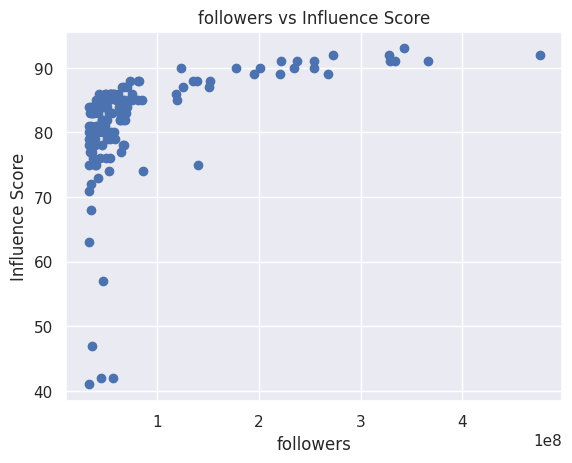

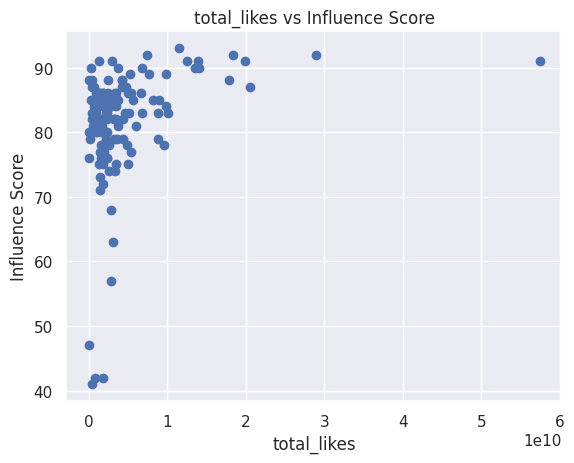

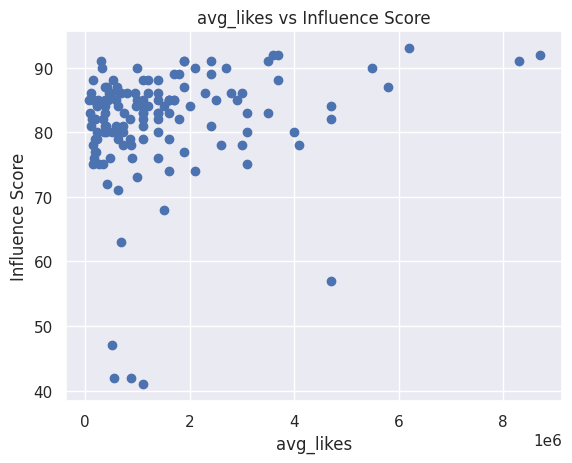

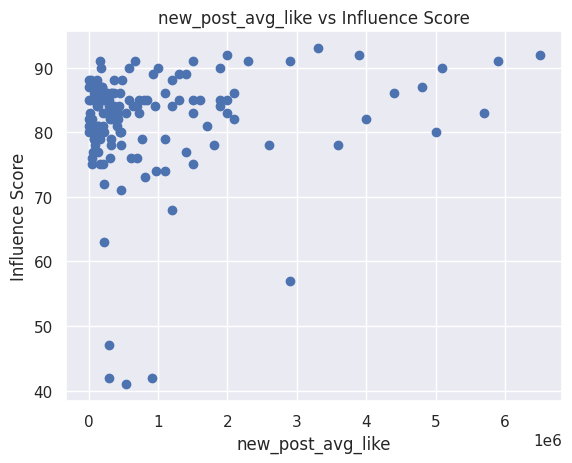

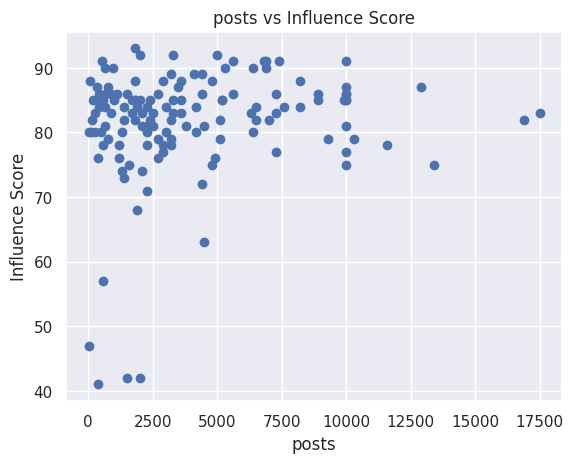

In [121]:
top_features = correlations[1:6].index  # Skip the first one (it's the target itself)
for feature in top_features:
    plt.scatter(df[feature], df['influence_score'])
    plt.xlabel(feature)
    plt.ylabel("Influence Score")
    plt.title(f"{feature} vs Influence Score")
    plt.show()

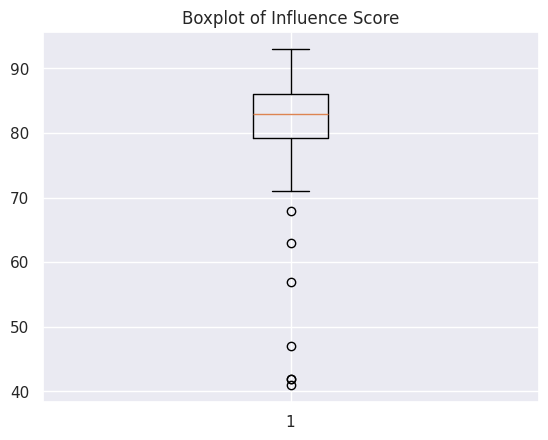

In [122]:
plt.boxplot(df['influence_score'])
plt.title("Boxplot of Influence Score")
plt.show()

In [123]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [124]:
print(df.columns.tolist())

['rank', 'channel_info', 'influence_score', 'posts', 'followers', 'avg_likes', '60_day_eng_rate', 'new_post_avg_like', 'total_likes', 'country']


In [125]:
X = df[['followers', 'avg_likes', '60_day_eng_rate']]
y = df['influence_score']

In [126]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import torch

# Drop NaNs to avoid nan issues
df = df.dropna()

# Select features and target
X = df[['followers', 'avg_likes', '60_day_eng_rate']]
y = df['influence_score']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Convert to tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)

X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

In [127]:
import torch.nn as nn
import torch.optim as optim

# Define the model
class InfluencerNet(nn.Module):
    def __init__(self):
        super(InfluencerNet, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(3, 16),  # 3 input features
            nn.ReLU(),
            nn.Linear(16, 8),
            nn.ReLU(),
            nn.Linear(8, 1)   # Output: influence_score
        )

    def forward(self, x):
        return self.net(x)

# Initialize the model
model = InfluencerNet()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [128]:
# Train the model
epochs = 100
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

Epoch [10/100], Loss: 6688.3623
Epoch [20/100], Loss: 6386.6587
Epoch [30/100], Loss: 5710.9995
Epoch [40/100], Loss: 4469.4209
Epoch [50/100], Loss: 2746.5115
Epoch [60/100], Loss: 1200.9457
Epoch [70/100], Loss: 521.0959
Epoch [80/100], Loss: 446.7941
Epoch [90/100], Loss: 336.1443
Epoch [100/100], Loss: 276.7151


In [129]:
model.eval()
with torch.no_grad():
    predictions = model(X_test_tensor).numpy().flatten()
    ground_truth = y_test_tensor.numpy().flatten()

from sklearn.metrics import r2_score
r2 = r2_score(ground_truth, predictions)
print("R² Score:", r2)

R² Score: -10.79924488067627


In [130]:
feature_cols = ['followers', 'avg_likes', '60_day_eng_rate', 'posts', 'new_post_avg_like', 'total_likes']

In [131]:
def convert_shorthand(value):
    if isinstance(value, str):
        value = value.strip().lower().replace(',', '')
        if 'k' in value:
            return float(value.replace('k', '')) * 1_000
        elif 'm' in value:
            return float(value.replace('m', '')) * 1_000_000
    try:
        return float(value)
    except:
        return None

In [132]:
for col in ['followers', 'avg_likes', 'total_likes', 'new_post_avg_like']:
    df[col] = df[col].apply(convert_shorthand)

In [133]:
df.dropna(inplace=True)

In [134]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

features = ['followers', 'avg_likes', 'posts', 'total_likes', '60_day_eng_rate', 'new_post_avg_like']
target = 'influence_score'

X = df[features]
y = df[target]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [135]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("R² Score:", r2_score(y_test, y_pred))

R² Score: 0.08011713693012712


In [136]:
df['log_followers'] = np.log1p(df['followers'])

In [137]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("R² Score:", r2_score(y_test, y_pred))

R² Score: -0.9593405032747326


In [138]:
print(df.select_dtypes(include=np.number).corr()['influence_score'].sort_values(ascending=False))

influence_score      1.000000
log_followers        0.497563
followers            0.443995
total_likes          0.297215
avg_likes            0.210109
new_post_avg_like    0.170787
posts                0.162550
60_day_eng_rate     -0.107452
rank                -0.487032
Name: influence_score, dtype: float64


In [139]:
selected_features = ['log_followers', 'followers', 'total_likes', 'avg_likes', 'new_post_avg_like', 'posts']
X = df[selected_features]
y = df['influence_score']

In [140]:
selected_features = ['log_followers', 'followers', 'total_likes', 'avg_likes', 'new_post_avg_like', 'posts']
X = df[selected_features]
y = df['influence_score']

In [141]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [142]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

model = RandomForestRegressor()
model.fit(X_train, y_train)

preds = model.predict(X_test)
print("R² Score:", r2_score(y_test, preds))

R² Score: -0.87145563598759


In [143]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)

print("Linear Regression R² Score:", r2_score(y_test, lr_preds))

Linear Regression R² Score: 0.050628136972043936


In [144]:
df['likes_per_post'] = df['total_likes'] / df['posts']
df['engagement_score'] = df['avg_likes'] / df['followers']
df['likes_growth'] = df['new_post_avg_like'] - df['avg_likes']

In [145]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor()
model.fit(X_train, y_train)
preds = model.predict(X_test)

print("Gradient Boosting R² Score:", r2_score(y_test, preds))

Gradient Boosting R² Score: -1.5686971804650987


In [146]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Then use X_scaled in train_test_split

In [147]:
selected_features = ['followers', 'total_likes', 'avg_likes', 'posts',
                     'likes_per_post', 'engagement_score', 'likes_growth']
X = df[selected_features]
y = df['influence_score']

In [148]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split scaled data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)

In [149]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)

print("XGBoost R² Score:", r2_score(y_test, xgb_preds))

XGBoost R² Score: -1.006547212600708


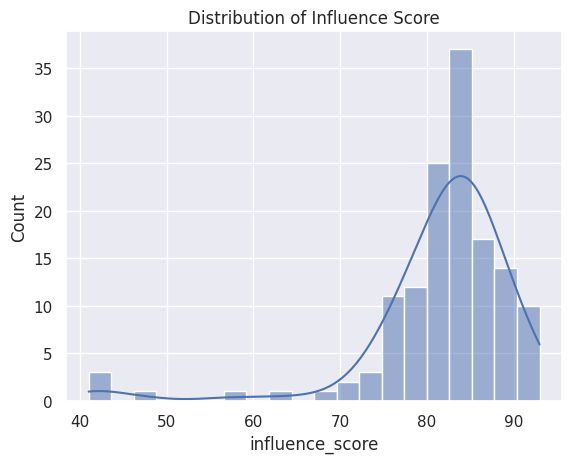

In [150]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['influence_score'], kde=True)
plt.title("Distribution of Influence Score")
plt.show()

In [151]:
import numpy as np

df['log_followers'] = np.log1p(df['followers'])
df['log_likes'] = np.log1p(df['total_likes'])
df['log_avg_likes'] = np.log1p(df['avg_likes'])
df['log_posts'] = np.log1p(df['posts'])

In [152]:
features = ['log_followers', 'log_likes', 'log_avg_likes', 'log_posts',
            'likes_per_post', 'engagement_score', 'likes_growth']

X = df[features]
y = df['influence_score']

In [153]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [154]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Random Forest R² Score:", r2_score(y_test, y_pred))

Random Forest R² Score: -0.725471492588762


In [155]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Linear Regression R² Score:", r2_score(y_test, y_pred))

Linear Regression R² Score: -0.39255364163636264


In [156]:
df.corr(numeric_only=True)['influence_score'].sort_values(ascending=False)

,influence_score
influence_score,1.000000
log_followers,0.497563
followers,0.443995
log_likes,0.341618
total_likes,0.297215
log_posts,0.225566
avg_likes,0.210109
likes_per_post,0.208738
new_post_avg_like,0.170787
posts,0.162550


In [157]:
df['likes_per_follower'] = df['total_likes'] / (df['followers'] + 1)
df['posts_per_follower'] = df['posts'] / (df['followers'] + 1)
df['likes_per_engagement'] = df['total_likes'] / (df['60_day_eng_rate'] + 1)

In [158]:
features = ['log_followers', 'log_likes', 'log_avg_likes', 'log_posts',
            'likes_per_post', 'engagement_score', 'likes_growth',
            'likes_per_follower', 'posts_per_follower', 'likes_per_engagement']

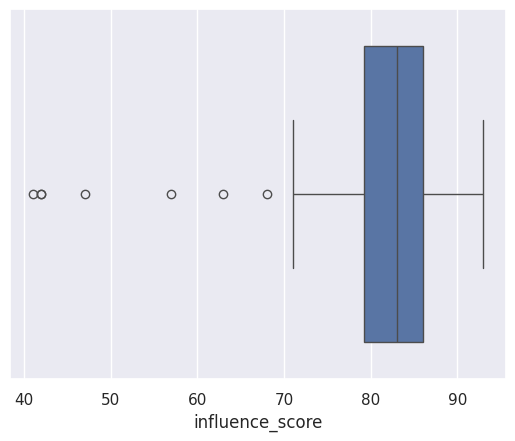

In [159]:
sns.boxplot(x=df['influence_score'])
plt.show()

In [160]:
df = df[df['influence_score'] < df['influence_score'].quantile(0.95)]

In [161]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Gradient Boosting R² Score:", r2_score(y_test, y_pred))

Gradient Boosting R² Score: -1.931103373964533
